## <font color='black'> Hotel Reservations. </font>


![](https://www.re-thinkingthefuture.com/wp-content/uploads/2020/08/A1609-10-things-to-remember-while-designing-hotels.jpg)

#### The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

#### Our data has 36275 values and 19 columns, Here we will use the "Hotel Reservation.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk(''):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('ignore')

#### Importing Libraries.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

## <font color='blue'> 1. Importing Dataset. </font>


#### Here we are reading the database using the name "df" in the variable.

In [3]:
df = pd.read_csv('Hotel Reservations.csv', sep = ',')

#### Here we can see that we have categorical and continuous variables, we can also see that we have this column Booking ID that will probably not be used, we can also see that we don't have null values.

#### Here the explanation about the variables:

- Booking_ID: unique identifier of each booking
- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- booking_status: Flag indicating if the booking was canceled or not.

In [4]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [7]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## <font color='blue'> 2. Data Analysis. </font>


#### Verifying the correlation between our variables.

- We can see that we don't have strong correlation between the variables.

<Axes: >

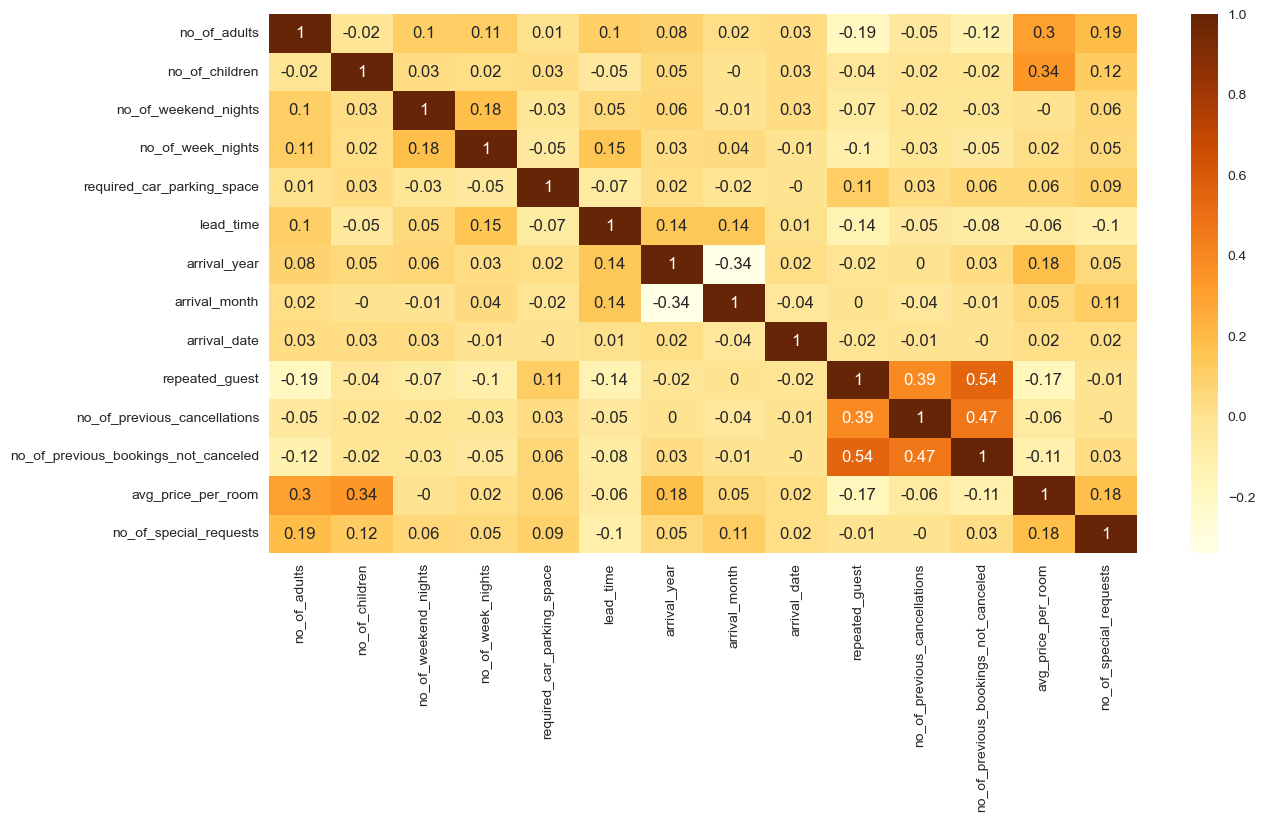

In [8]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

#### Categorical Variables

#### Looking at our categorical variables, we can see that most reservations are made for rooms with two adults, without children, generally reservations are short-term, not many cases are long-term, most reservations select meal_plan_1, no need a car space, the most booked room types are types 1 and 4 and most of our data is 2018 bookings.

<Axes: title={'center': 'Variable arrival_year'}, xlabel='arrival_year', ylabel='count'>

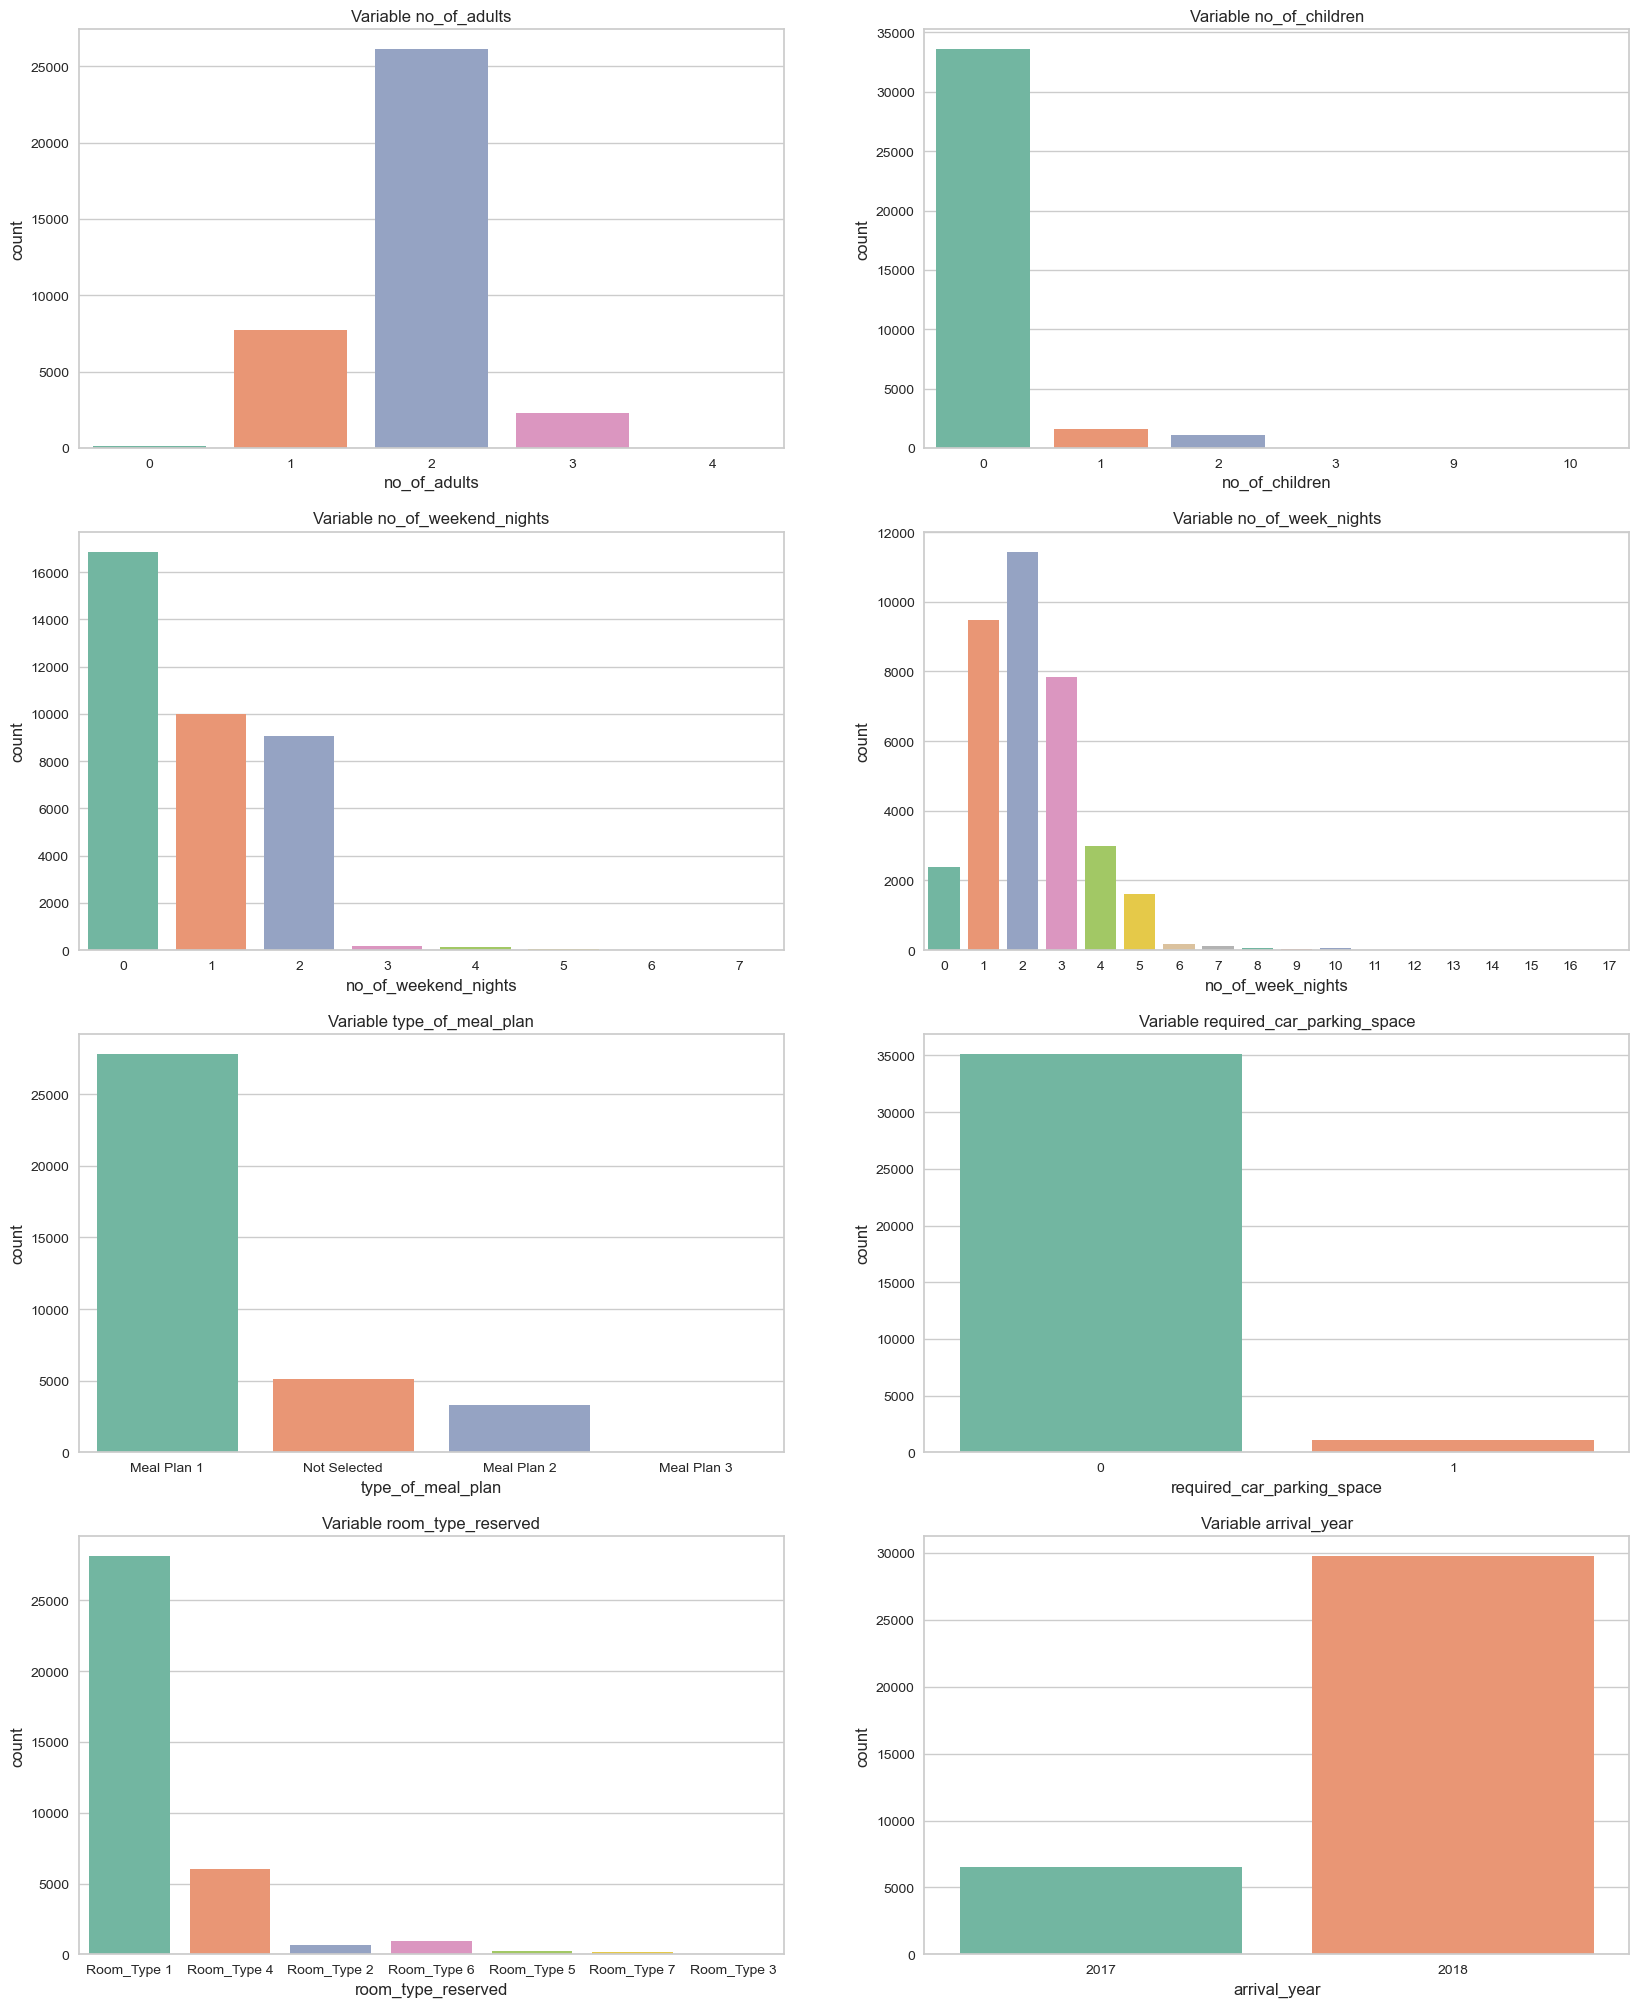

In [9]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

#### When we look at the bookings by month, we can see that there is an increase, from January to October the number of bookings gradually grows and it drops again in the months of November and December, most bookings are made online, most of the guests are guests who they have never been to the hotel and are usually guests who have never canceled, the greater the number of special requests, the less data we have. When we look at our target variable, we can see that we have approximately 65% ​​of reservations that have not been cancelled.

<Axes: title={'center': 'Variable booking_status'}, xlabel='booking_status', ylabel='count'>

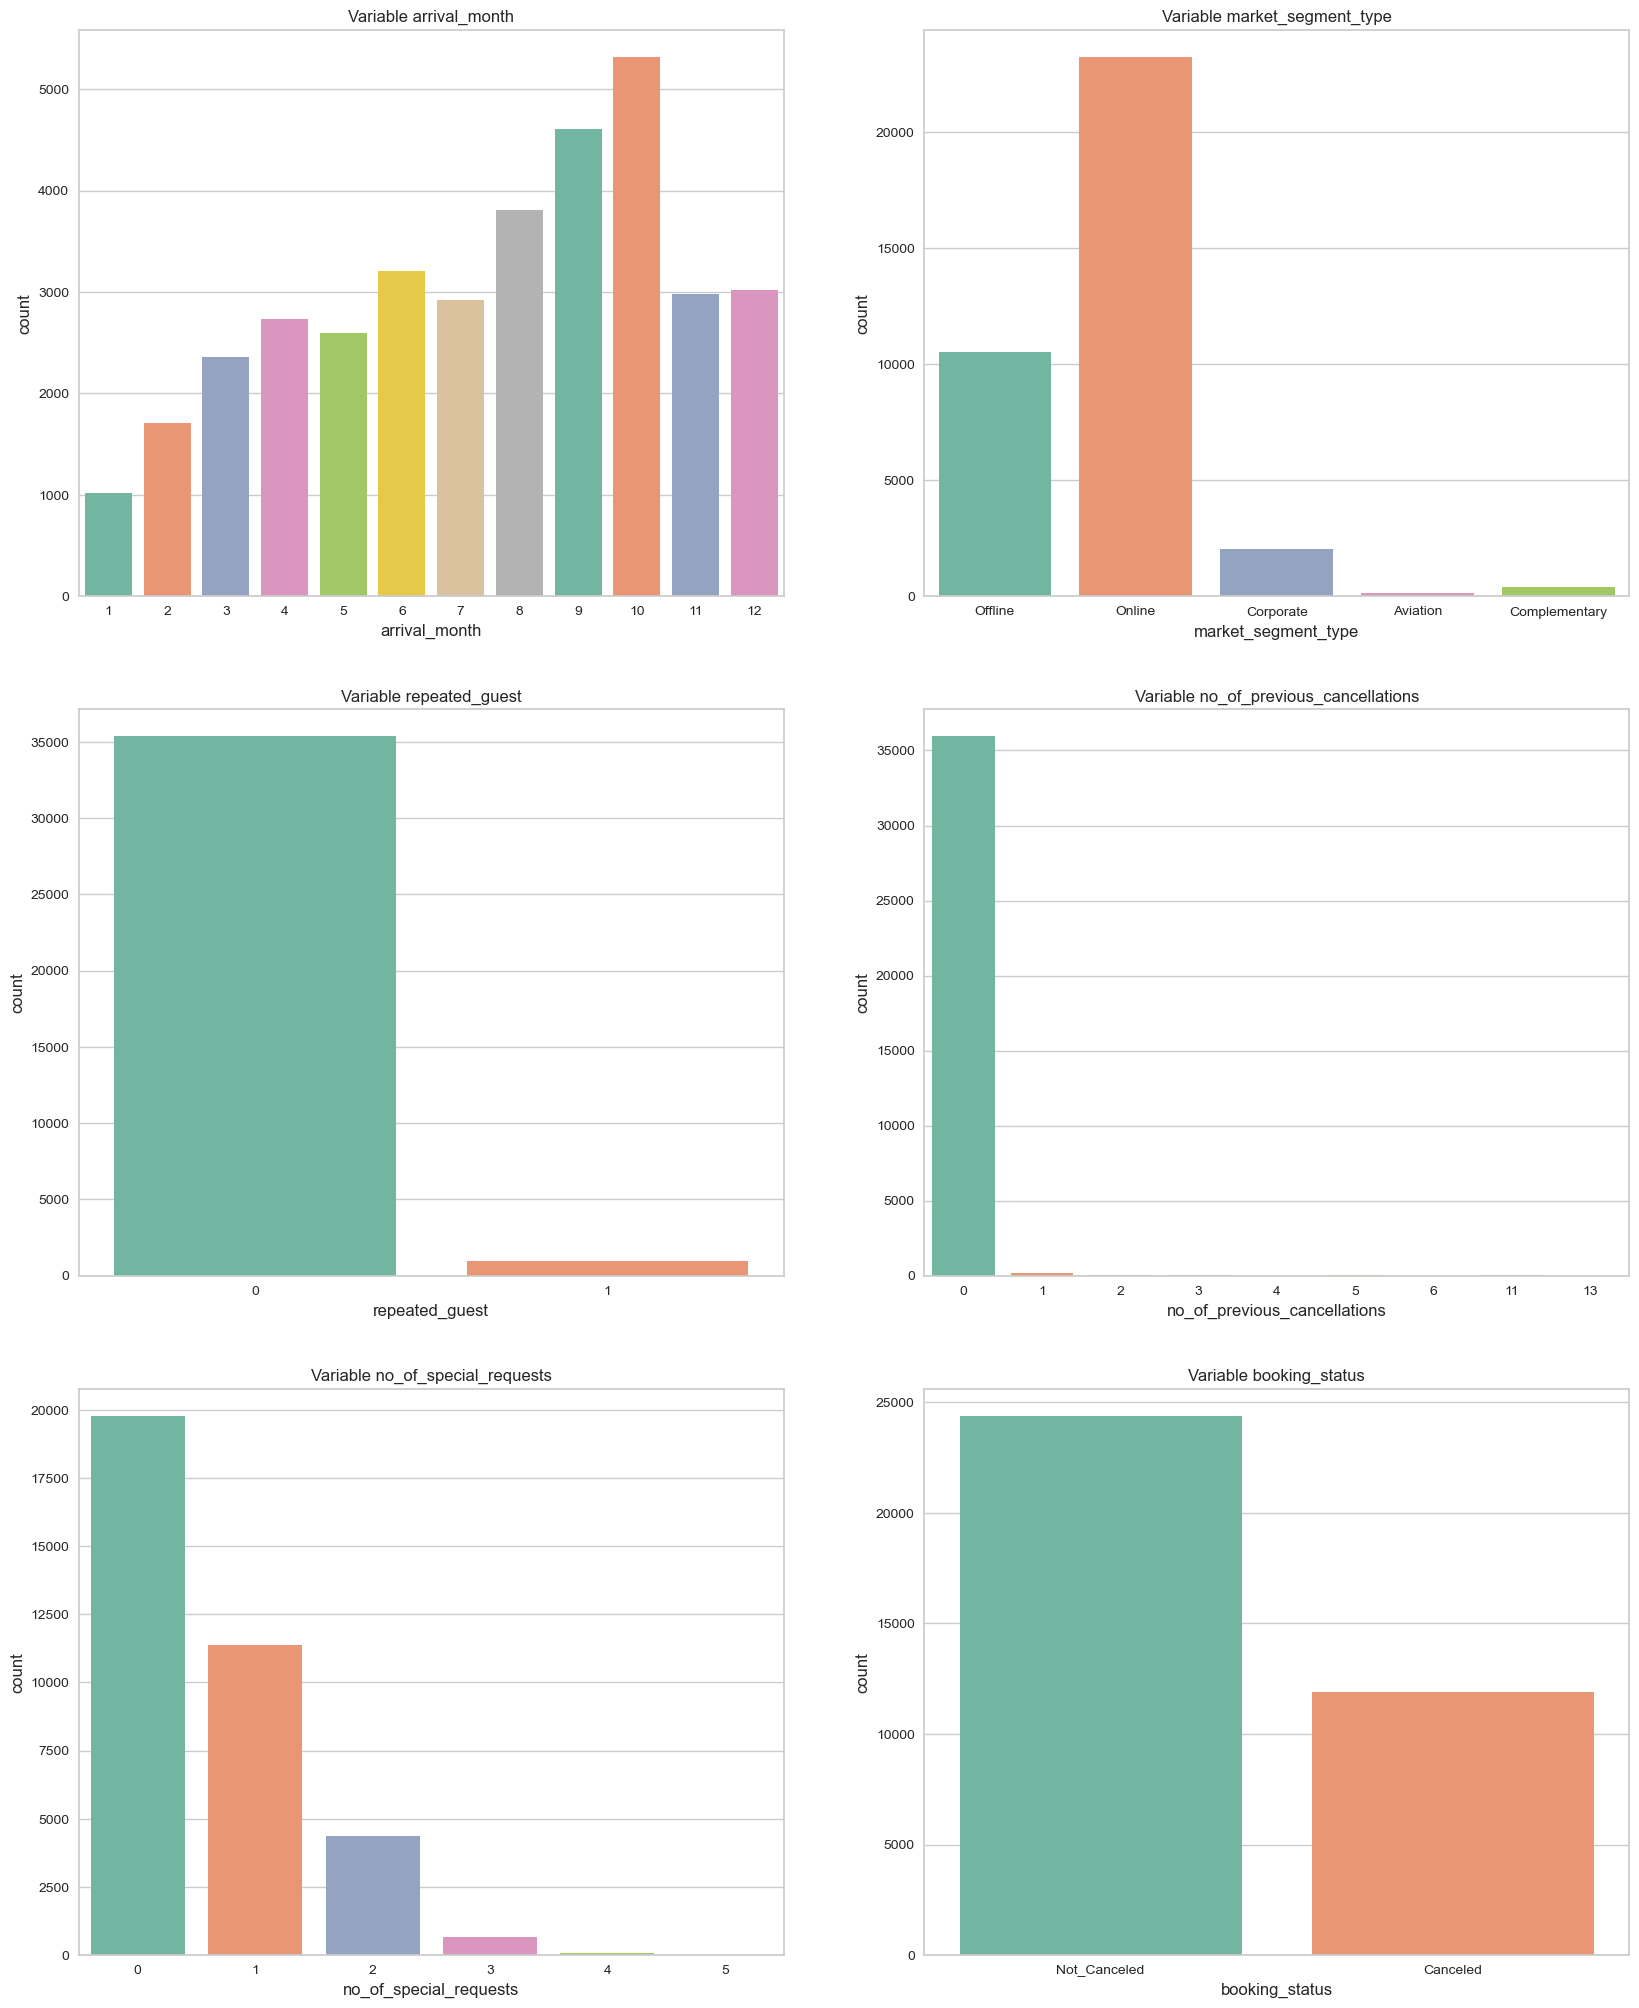

In [10]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

#### Continous Variables

#### Looking at our continuous variables we can see that generally reservations are made without taking too long, the longer it takes, the smaller the number of reservations, we can see that the top of our data is usually at 100 euros the average price of the room and that the guests usually never canceled a booking before.

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='Count'>

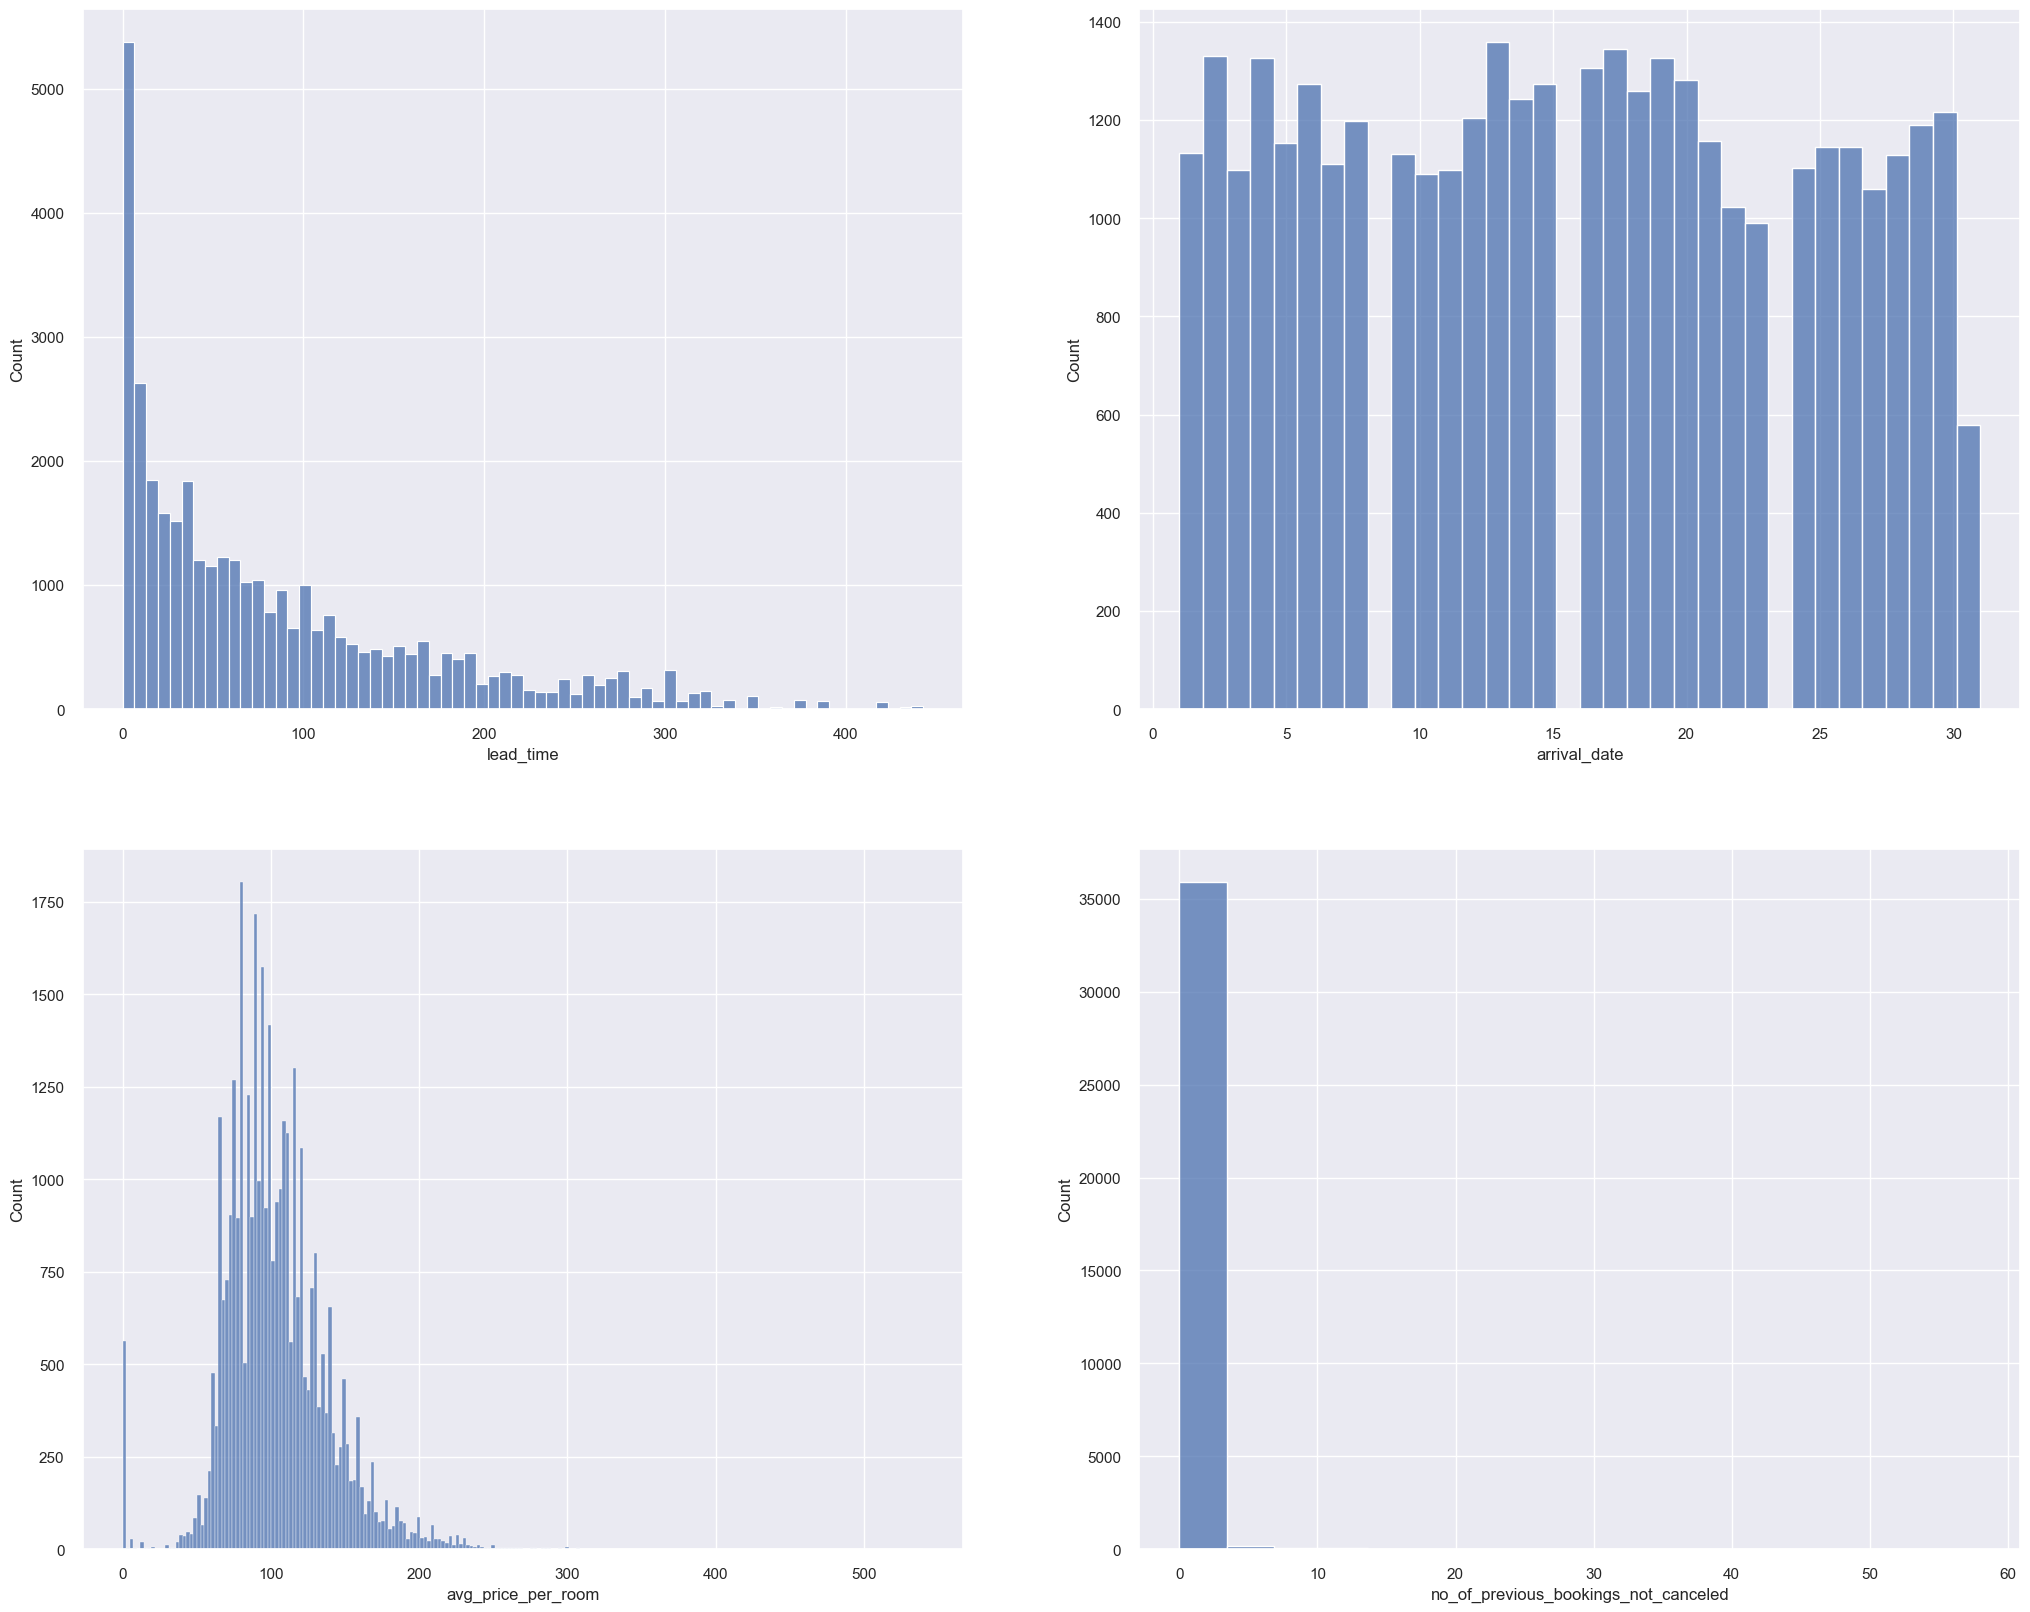

In [11]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

#### When checking our Boxplots, we can see that we have some outliers but for now we are not going to deal with them.

<Axes: title={'center': 'Boxplot lead_time'}, xlabel='lead_time'>

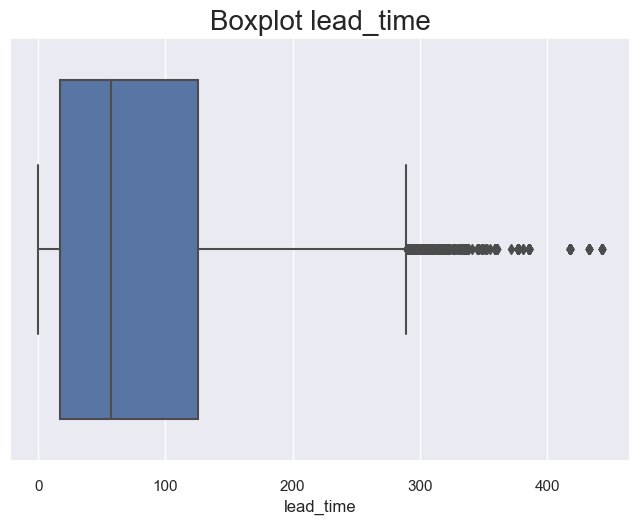

In [12]:
plt.title("Boxplot lead_time", fontdict = {'fontsize': 20})
sns.boxplot(x=df["lead_time"])

<Axes: title={'center': 'Boxplot avg_price_per_room'}, xlabel='avg_price_per_room'>

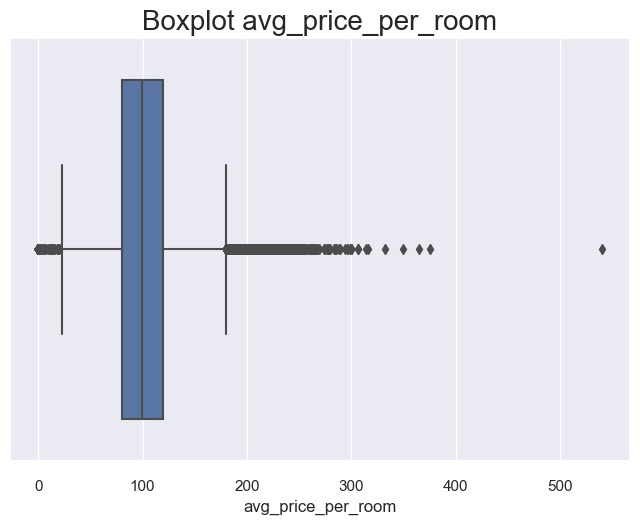

In [13]:
plt.title("Boxplot avg_price_per_room", fontdict = {'fontsize': 20})
sns.boxplot(x=df["avg_price_per_room"])

#### Bivariate Analysis

#### Looking at our target variable, we can have some insights, generally guests who request a parking space, guests who have stayed previously are guests who generally do not cancel the reservation, guests who request special requests are guests less likely to cancel, the more requests, the less probably, the biggest distortion we see here is the Lead_Time variable, the longer the person takes to book the room, the more likely they are to cancel, which makes a lot of sense, another interesting view is that in the final 3 months of the year we usually have less cancellations, despite being a slight incline, we can see that more expensive rooms may also experience more cancellations.

<Axes: xlabel='booking_status', ylabel='count'>

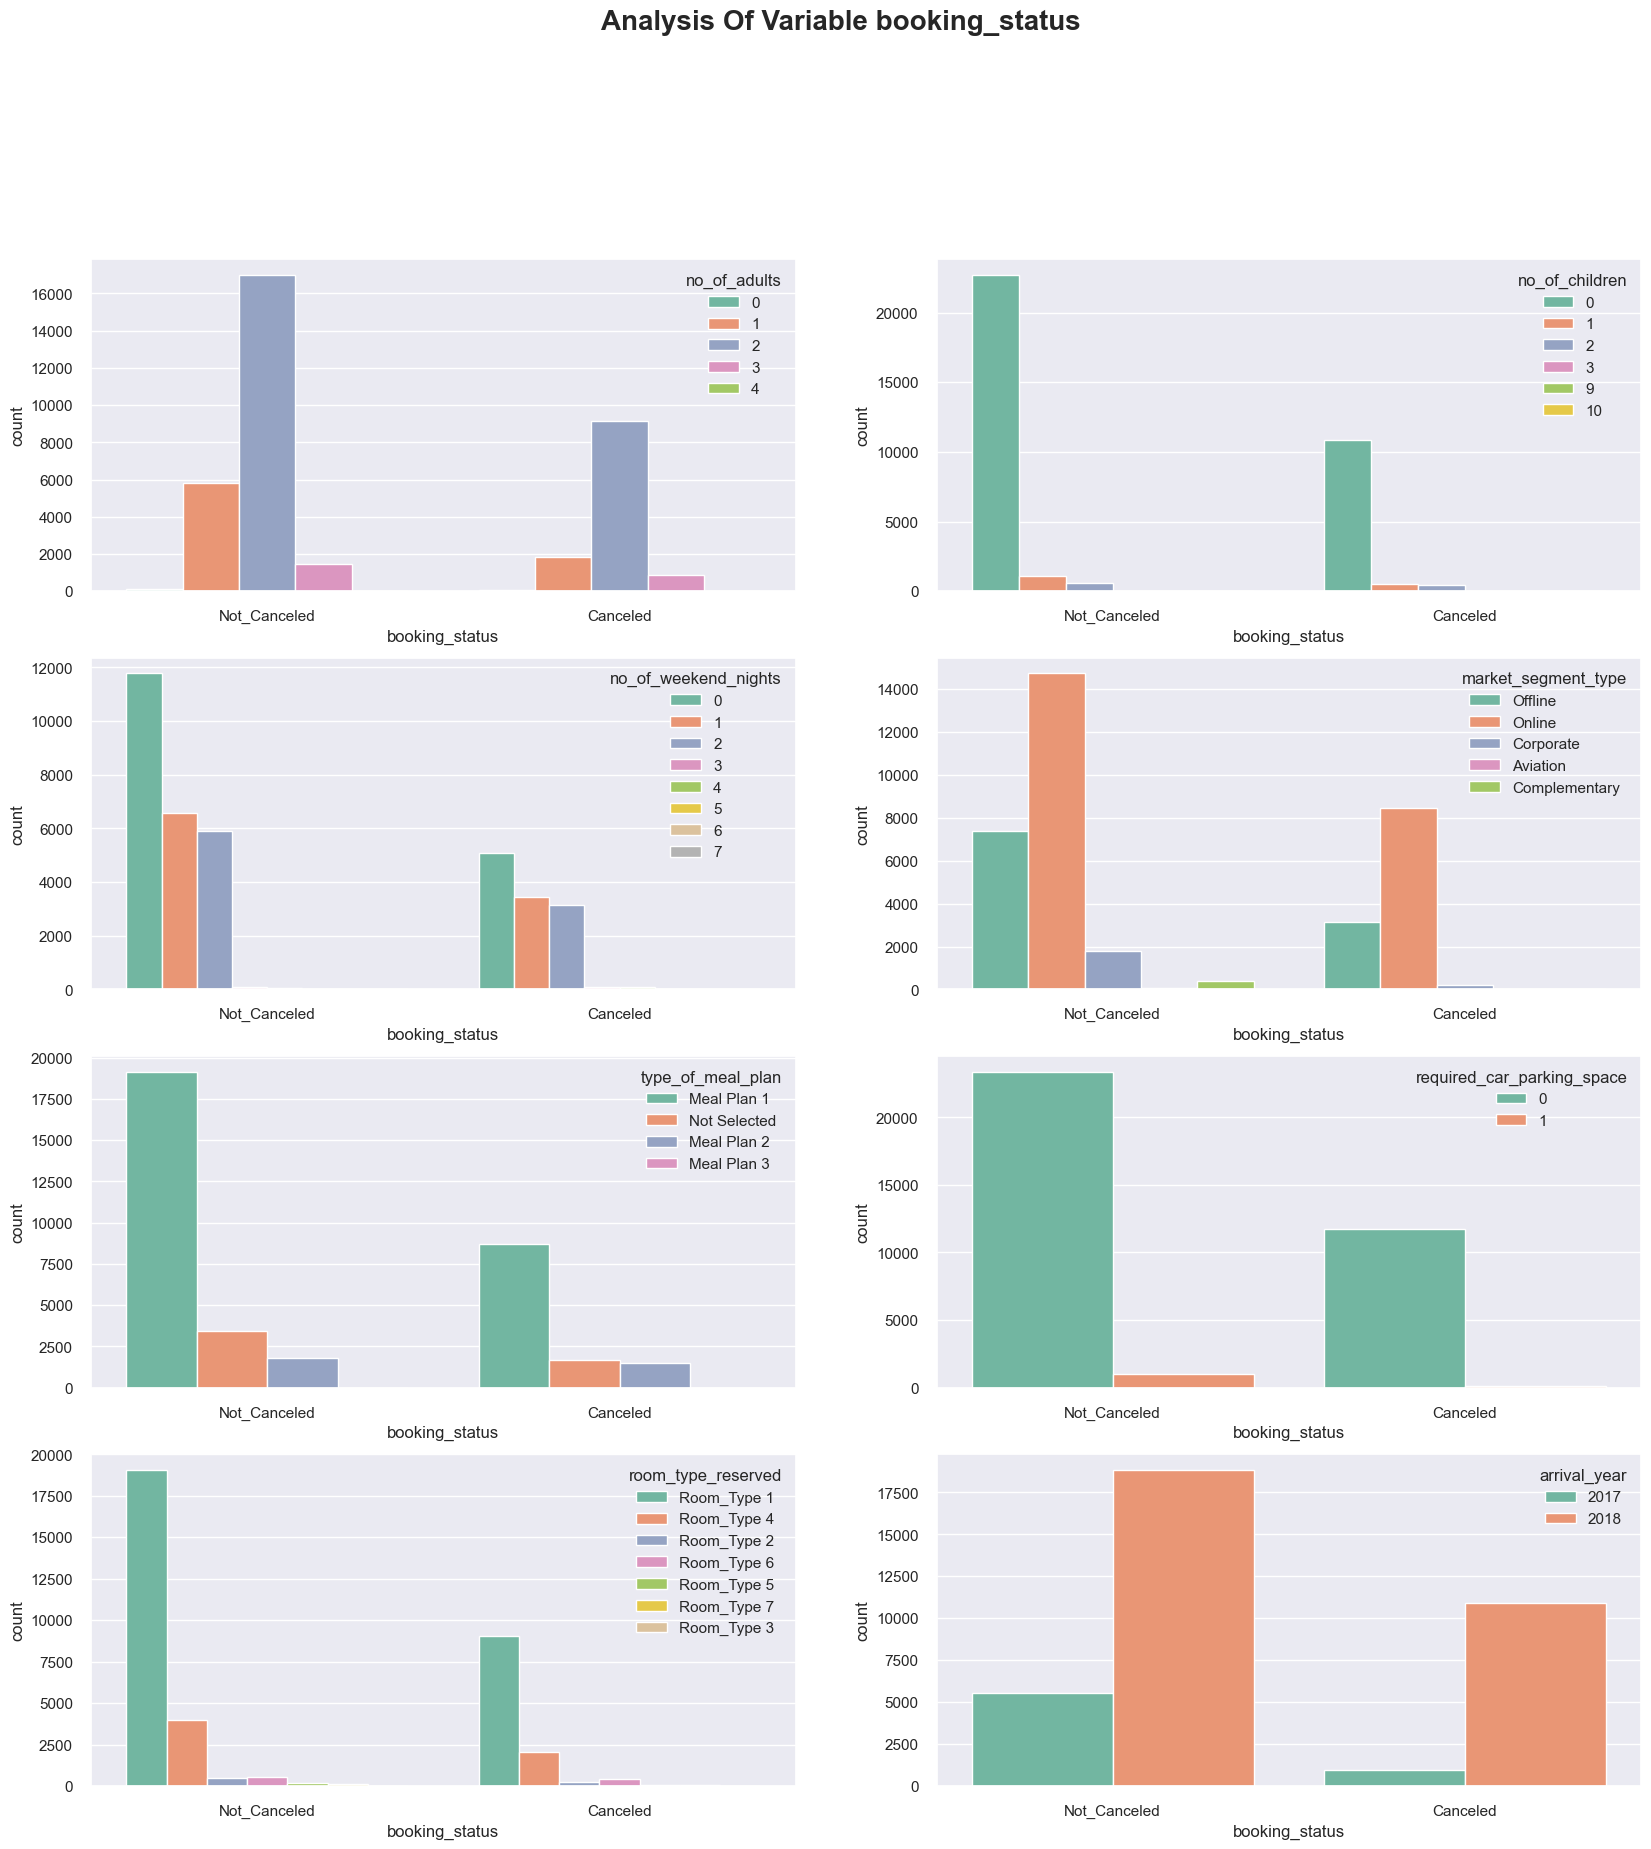

In [14]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

<Axes: xlabel='avg_price_per_room', ylabel='Density'>

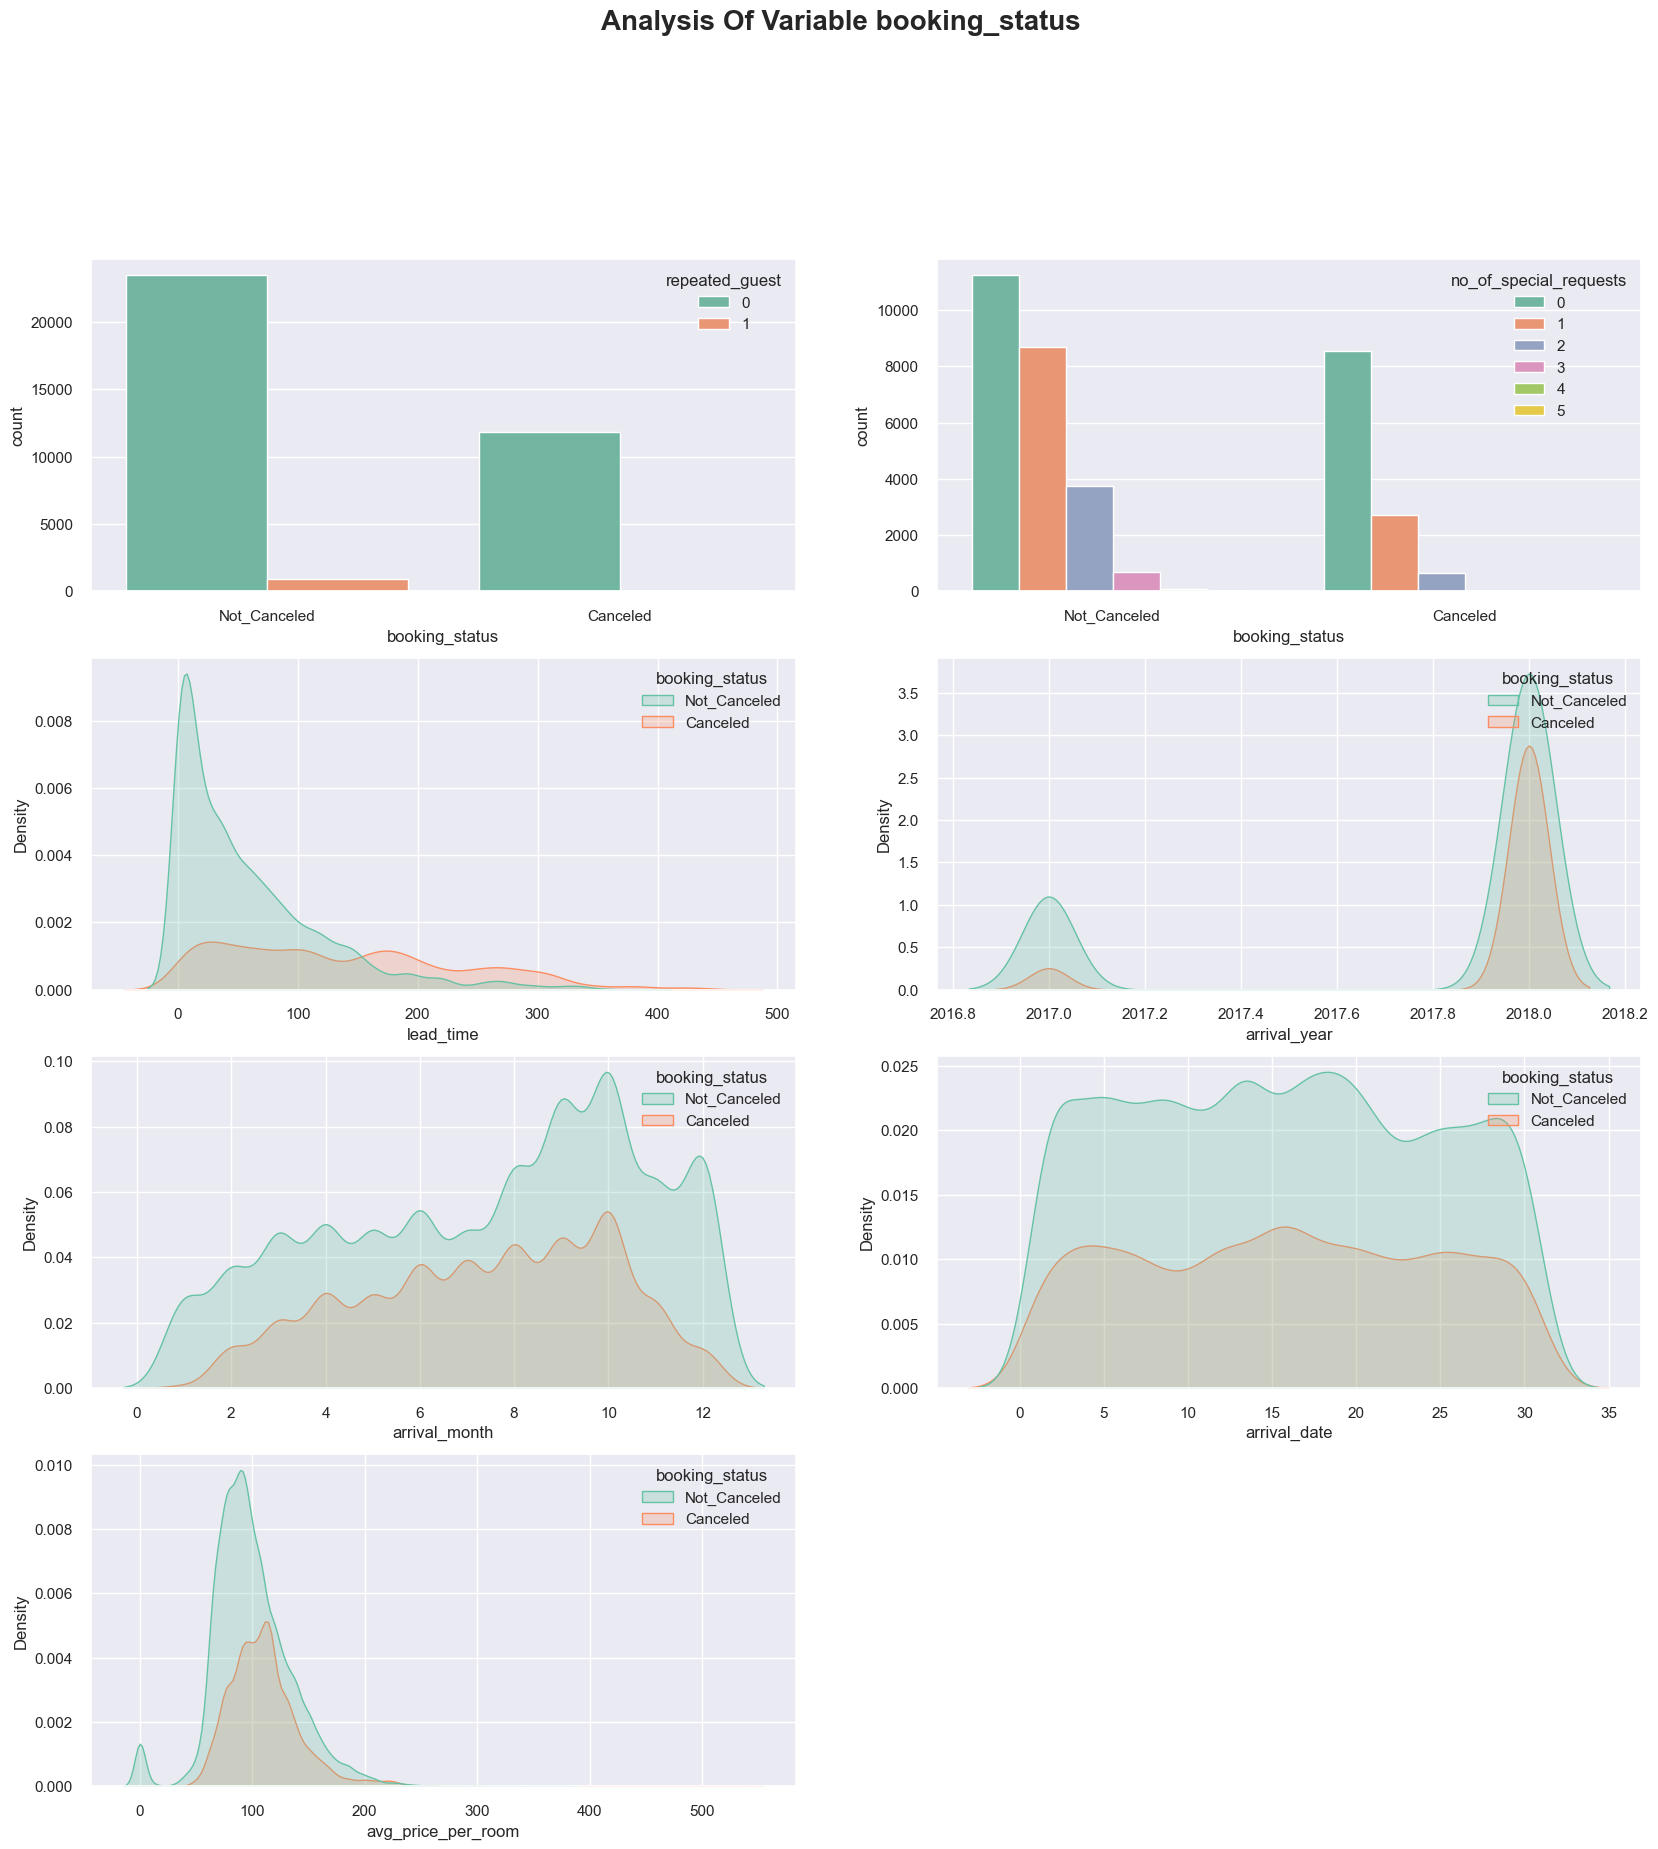

In [15]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,4)
sns.kdeplot(x='arrival_year', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,5)
sns.kdeplot(x='arrival_month', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,6)
sns.kdeplot(x='arrival_date', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(5,2,7)
sns.kdeplot(x='avg_price_per_room', hue='booking_status', palette = 'Set2', shade=True, data=df)

#### Now, as we saw earlier, the Lead_Time variable was the one that had the most differentiation between canceled and non-cancelled, so let's take a deeper look at it, we can see that generally those who request a car parking space have a shorter lead time, we see the same something with guests who have already stayed at the hotel, when we look at the other variables we have some that call our attention, the variable no_weekend_nights usually those who stay 3 or 4 nights have a longer lead_time, when we look at the segment too, guests on "special" reasons usually do not have a high lead time, when we look at meal_plan, guests who use meal_plan2 usually have a very high lead time, when we look at the type of room we see that we have some rooms that are selected faster than others and when we look at the special requests, although it takes, the more requests, the lead time goes down.

<Axes: xlabel='lead_time', ylabel='Density'>

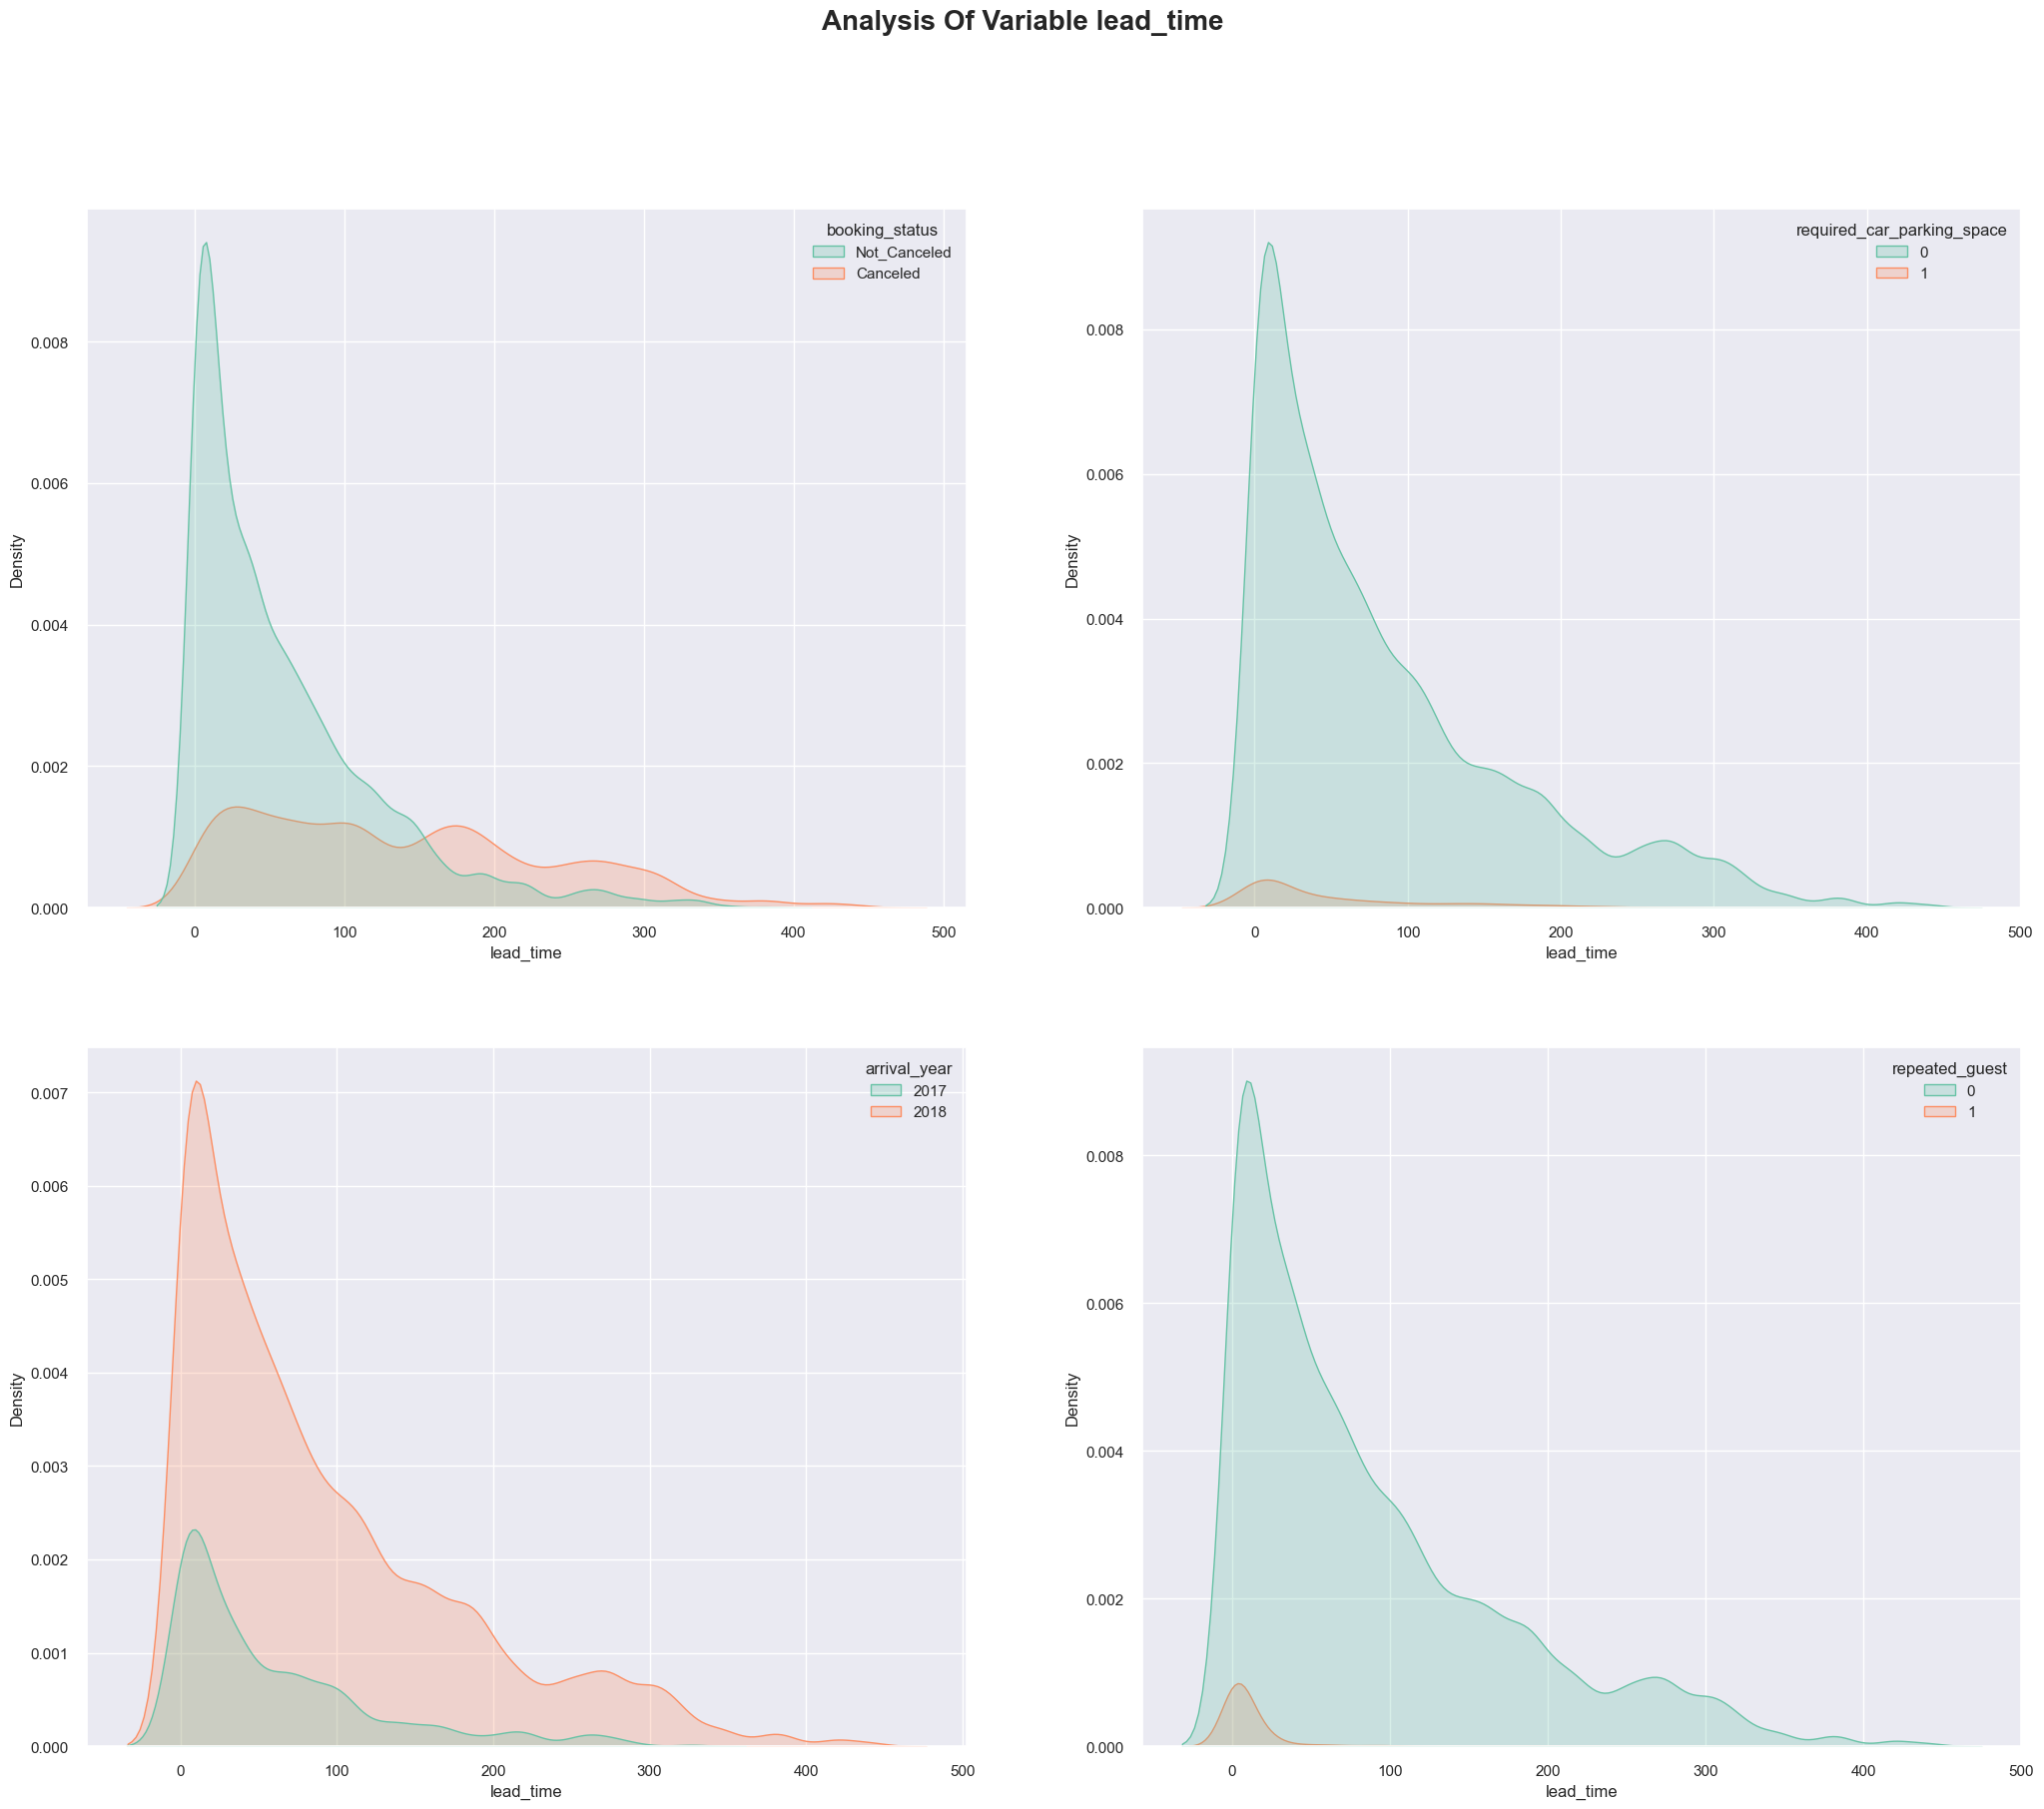

In [16]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(2,2,1)
sns.kdeplot(x='lead_time', hue='booking_status', palette = 'Set2', shade=True, data=df)

plt.subplot(2,2,2)
sns.kdeplot(x = 'lead_time', hue = 'required_car_parking_space', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,3)
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', palette = 'Set2', shade=True, data = df)

plt.subplot(2,2,4)
sns.kdeplot(x='lead_time', hue='repeated_guest', palette = 'Set2', shade=True, data=df)


<Axes: xlabel='no_of_special_requests', ylabel='lead_time'>

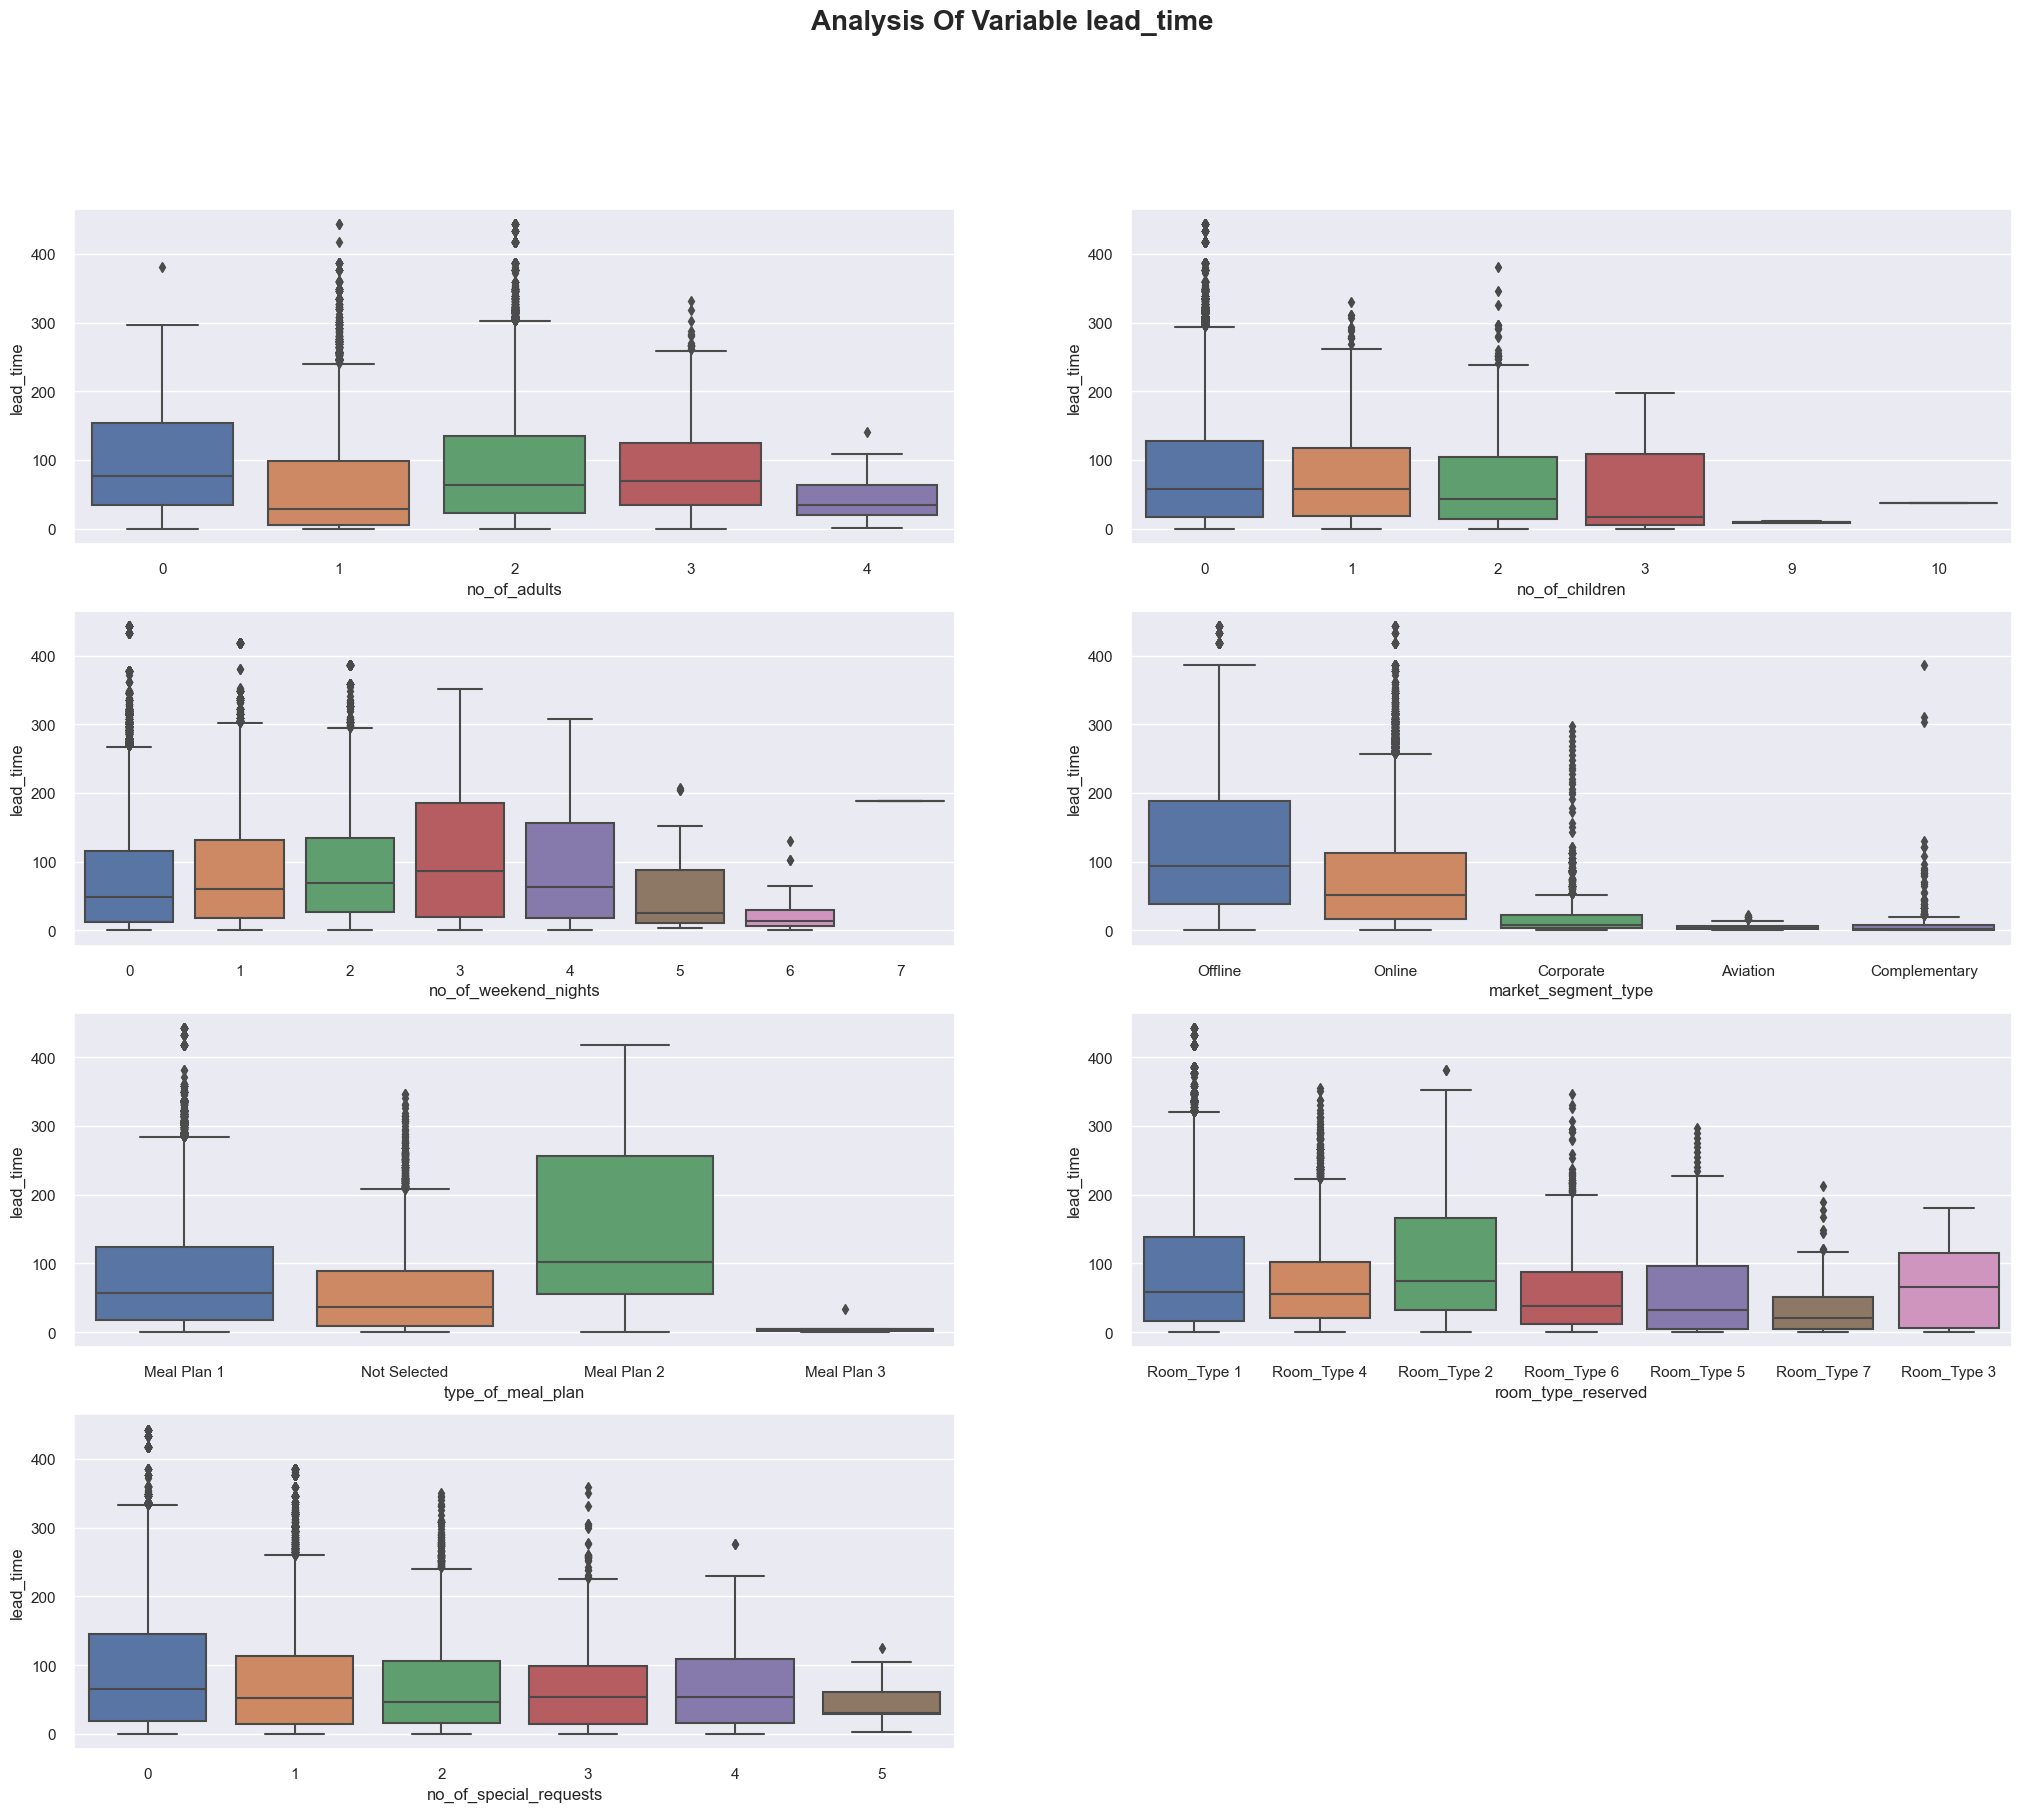

In [17]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,2,1)
sns.boxplot(x="no_of_adults", y="lead_time", data=df)

plt.subplot(4,2,2)
sns.boxplot(x="no_of_children", y="lead_time", data=df)

plt.subplot(4,2,3)
sns.boxplot(x="no_of_weekend_nights", y="lead_time", data=df)

plt.subplot(4,2,4)
sns.boxplot(x="market_segment_type", y="lead_time", data=df)

plt.subplot(4,2,5)
sns.boxplot(x="type_of_meal_plan", y="lead_time", data=df)

plt.subplot(4,2,6)
sns.boxplot(x="room_type_reserved", y="lead_time", data=df)

plt.subplot(4,2,7)
sns.boxplot(x="no_of_special_requests", y="lead_time", data=df)

#### We can see that at the beginning of the year and at the end of the year are the months in which reservations are made more quickly, when we look at guests who have already canceled and those who have not stayed we can see the same pattern, those who already know the hotel do not have a high lead time.

<Axes: xlabel='no_of_previous_bookings_not_canceled', ylabel='lead_time'>

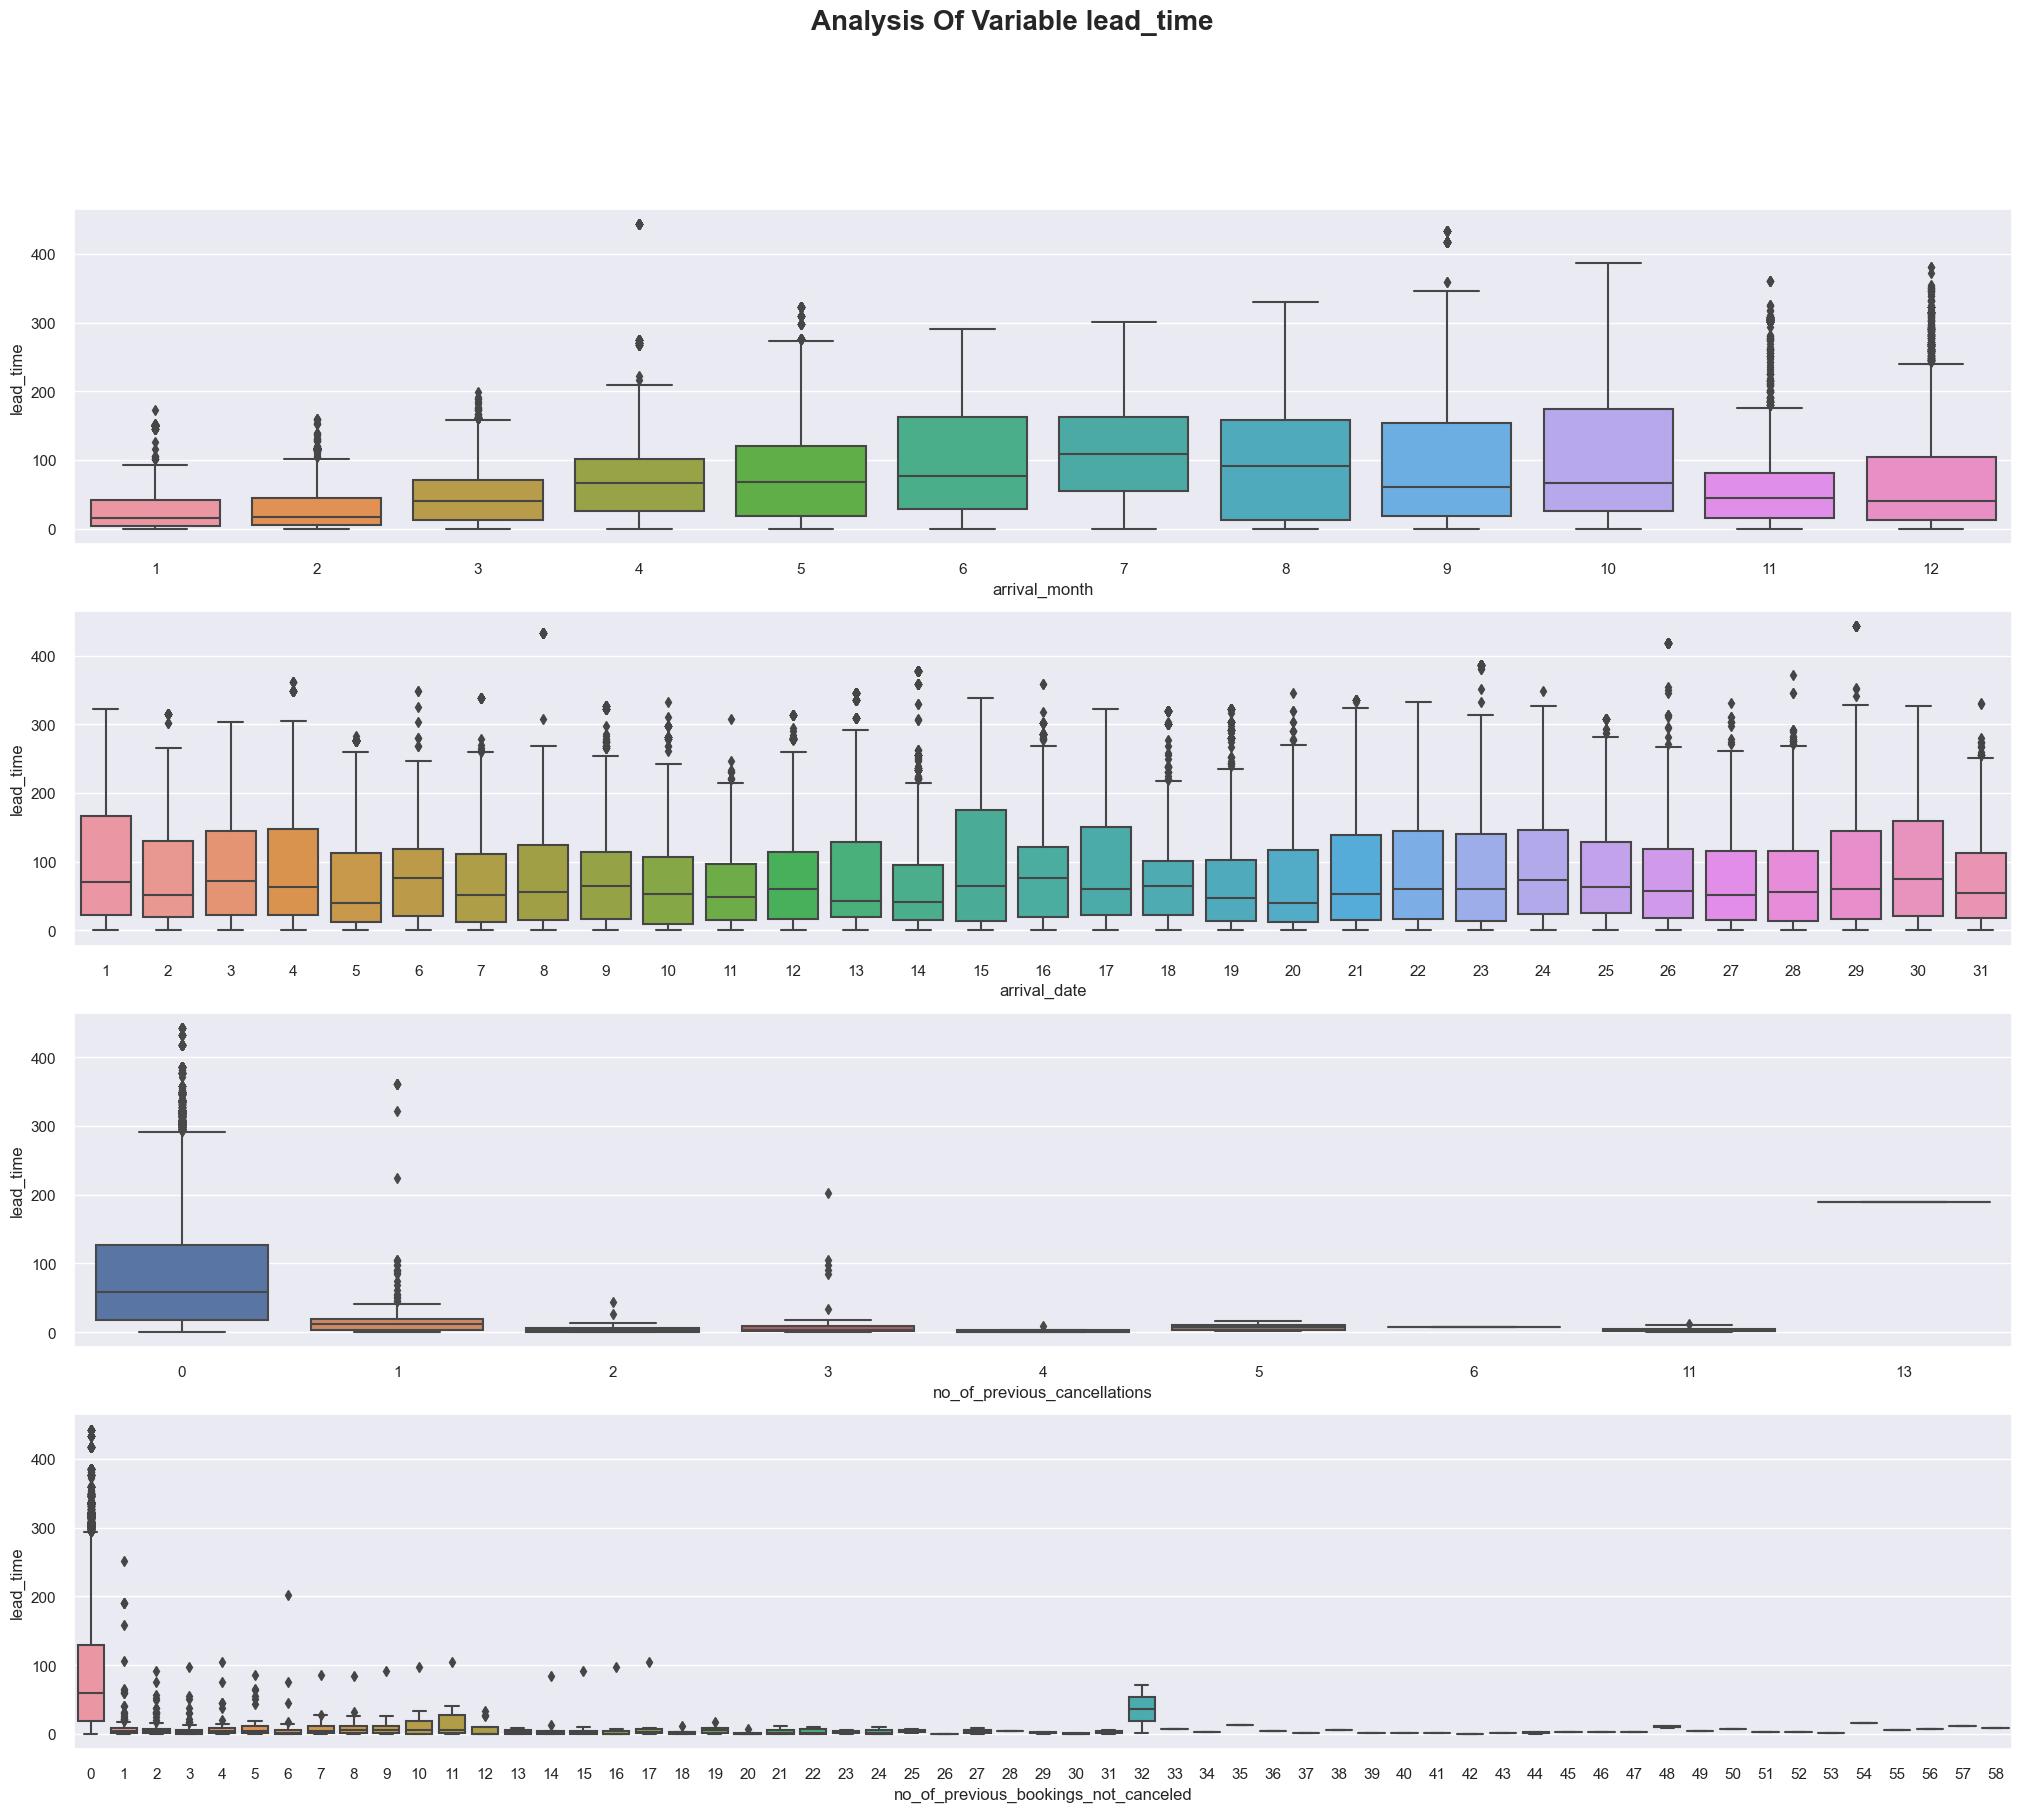

In [18]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable lead_time",fontweight="bold", fontsize=20)

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month", y="lead_time", data=df)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date", y="lead_time", data=df)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations", y="lead_time", data=df)

plt.subplot(4,1,4)
sns.boxplot(x="no_of_previous_bookings_not_canceled", y="lead_time", data=df)

#### Looking here we can see that we have a tendency for higher price x higher lead time for cancellations.

<Axes: xlabel='lead_time', ylabel='avg_price_per_room'>

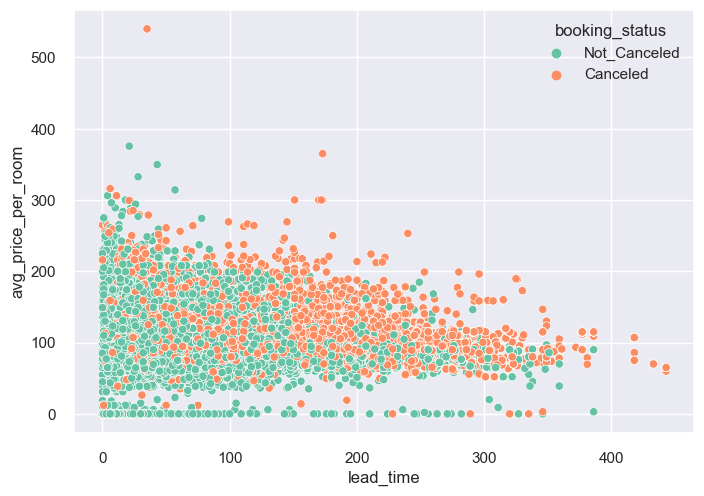

In [19]:
sns.scatterplot(data=df, x="lead_time", y="avg_price_per_room", palette = 'Set2', hue = 'booking_status')

## <font color='blue'> 3. Model Building. </font>


#### Here we will remove the Booking_ID variable that will not be used

In [20]:
df = df.drop('Booking_ID', axis = 1)

In [21]:
df.head(1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.0,0,Not_Canceled


#### Label Encoder

#### Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.

In [22]:
object_data = df.select_dtypes(include='object')
num_data = df.select_dtypes(exclude='object')

In [23]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

for i in range(0, object_data.shape[1]):
    object_data.iloc[:,i]= enc.fit_transform(object_data.iloc[:,i])

In [24]:
df = pd.concat([num_data, object_data], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   required_car_parking_space            36275 non-null  int64  
 5   lead_time                             36275 non-null  int64  
 6   arrival_year                          36275 non-null  int64  
 7   arrival_month                         36275 non-null  int64  
 8   arrival_date                          36275 non-null  int64  
 9   repeated_guest                        36275 non-null  int64  
 10  no_of_previous_cancellations          36275 non-null  int64  
 11  no_of_previous_

#### Separating into features variables and target variable.

In [25]:
X = df.drop('booking_status', axis = 1)
y = df['booking_status']

#### Balancing Classes

#### As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

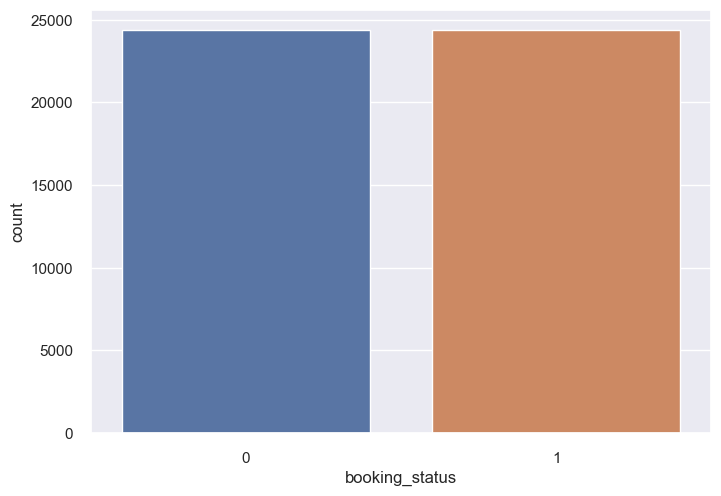

In [26]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

#### StandardScaler

#### Here we will use StandardScaler to put our data in the same scale.

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#### Naive Bayes
#### Running Gaussian Model.
#### Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

In [29]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

#### Result

#### We had 56,62% accuracy, It's definitely not a good model, it learned a lot to predict the reservations that will be canceled but practically didn't learn the ones that won't.

In [30]:
naive_bayes.score(X_test, y_test)

0.5662839961732951

In [31]:
score_naive_gaussian = 0.5662839961732951

#### Decision Tree
#### Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.

#### Applying GridSearch
#### Here we are applying GridSearch to check which are the best metrics to use.

In [32]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7])})

#### Decision Tree - GridSearch

In [33]:
print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.8667779195906185


#### Running Decision Tree.

In [34]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

In [35]:
decision_tree.score(X_test, y_test)

0.8666119994533279

#### Result

#### We had 86,67% accuracy, Here we had a very significant improvement when compared to Naive Bayes, the model was able to predict both results.

In [36]:
score_tree = 0.8666119994533279

#### Checking the most important variables of the model

In [37]:
columns = df.drop('booking_status', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

lead_time                               0.407914
market_segment_type                     0.150974
no_of_special_requests                  0.132184
avg_price_per_room                      0.102903
arrival_month                           0.061554
arrival_date                            0.031599
no_of_weekend_nights                    0.026191
no_of_week_nights                       0.024604
no_of_adults                            0.022819
arrival_year                            0.015146
required_car_parking_space              0.009469
type_of_meal_plan                       0.009398
room_type_reserved                      0.003677
no_of_children                          0.001365
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

#### Random Forest
#### Here we will use the Random Forest Model, we will test Entropy and Gini calculations.

#### Applying GridSearch

In [38]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  9, 11]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7]),
                         'n_estimators': array([100])})

#### Random Forest - GridSearch

In [39]:
print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.870584993333272
Mín Split:  4
Max Nvl:  11


#### Running Random Forest

In [40]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

In [41]:
random_forest.score(X_test, y_test)

0.8729670630039634

#### Result

#### We had 87,3% the model was able to predict both results, its a very good model.

In [42]:
score_random = 0.8729670630039634

#### Checking the most important variables of the model

In [43]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

lead_time                               0.374472
no_of_special_requests                  0.163812
avg_price_per_room                      0.111339
market_segment_type                     0.091648
arrival_month                           0.067869
arrival_year                            0.046859
arrival_date                            0.033019
no_of_week_nights                       0.025275
no_of_weekend_nights                    0.024748
no_of_adults                            0.018215
type_of_meal_plan                       0.012727
required_car_parking_space              0.010307
room_type_reserved                      0.008125
repeated_guest                          0.005180
no_of_children                          0.003060
no_of_previous_bookings_not_canceled    0.002859
no_of_previous_cancellations            0.000486
dtype: float64

#### Extra Trees
#### Here we will use the Extra Trees Model, we will test Entropy and Gini calculations.

#### Applying GridSearch

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
values_grid = {'n_estimators': n_estimators, 'criterion': alg}

model = ExtraTreesClassifier()
gridExtraTrees = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridExtraTrees.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'n_estimators': array([100])})

#### ExtraTrees - GridSearch

In [45]:
print('Algorithm: ', gridExtraTrees.best_estimator_.criterion)
print('Score: ', gridExtraTrees.best_score_)

Algorithm:  gini
Score:  0.9228899403478449


#### Running Extra Trees

In [46]:
extra_trees = ExtraTreesClassifier(n_estimators = 100, criterion = 'gini', random_state = 0)
extra_trees.fit(X_train, y_train)
previsoes = extra_trees.predict(X_test)

In [47]:
extra_trees.score(X_test, y_test)

0.9345360120267869

#### Result

#### Probably the best model we're going to have, 93.45% accuracy, the model was able to predict both results very well.

In [48]:
score_extra = 0.9345360120267869

#### Checking the most important variables of the model

In [49]:
feature_extra = pd.Series(extra_trees.feature_importances_, index = columns).sort_values(ascending = False)
feature_extra

lead_time                               0.282773
no_of_special_requests                  0.118359
avg_price_per_room                      0.116116
arrival_date                            0.091848
arrival_month                           0.091782
no_of_week_nights                       0.063140
market_segment_type                     0.050452
no_of_weekend_nights                    0.045782
arrival_year                            0.037426
no_of_adults                            0.031748
type_of_meal_plan                       0.022548
room_type_reserved                      0.019617
no_of_children                          0.009462
required_car_parking_space              0.009160
repeated_guest                          0.008538
no_of_previous_bookings_not_canceled    0.000690
no_of_previous_cancellations            0.000559
dtype: float64

#### K Neighbors
#### Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.

#### Here we will use the GridSearch to figure out the best metrics to use in this model.

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='accuracy')

#### KNN - GridSearch

In [51]:
grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8205939202249165)

#### Running K Neighbors

In [52]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

In [53]:
knn.score(X_test, y_test)

0.8733770671040044

#### Result

#### 87.33% accuracy, it's a very good model.

In [54]:
score_knn = 0.8733770671040044

#### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

In [56]:
logistic.score(X_test, y_test)

0.7811261445947792

#### Result

#### 77.89% accuracy, not a bad model, but not the best either.

In [57]:
logistic_normal = 0.7785977859778598

#### AdaBoost

#### Here we will use the AdaBoost Model, we will use the GridSearch Model to figure out the best metrics to use in this model.

#### Applying GridSearch

In [58]:
from sklearn.ensemble import AdaBoostClassifier

n_estimators = np.array([500])
learning_rate = np.array([2.0, 2.5, 1.9, 1.7, 0.5, 0.4])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = AdaBoostClassifier()
gridAdaBoost = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridAdaBoost.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([2. , 2.5, 1.9, 1.7, 0.5, 0.4]),
                         'n_estimators': array([500])})

#### AdaBoost - Grid

In [59]:
print('Learning Rate: ', gridAdaBoost.best_estimator_.learning_rate)
print('Score: ', gridAdaBoost.best_score_)

Learning Rate:  1.9
Score:  0.8196860516696622


#### Running AdaBoost

In [60]:
ada_boost = AdaBoostClassifier(n_estimators = 500, learning_rate = 1.9, random_state = 0)
ada_boost.fit(X_train, y_train)
previsoes = ada_boost.predict(X_test)

In [61]:
ada_boost.score(X_test, y_test)

0.8206915402487358

#### Result

#### 82,06% accuracy, not a bad model, but not the best either.

In [62]:
score_ada_scaler = 0.8206915402487358

#### Gradient Boosting

#### Here we will use the Gradient Boosting Model, here we will use the GridSearch Model to figure out the best metrics to use in this model.

In [63]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = np.array([300])
learning_rate = np.array([0.01, 0.02, 0.05, 0.07, 0.09, 0.1, 0.3, 0.5, 0.005])
values_grid = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

model = GradientBoostingClassifier()
gridGradient = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5, n_jobs = -1)
gridGradient.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': array([0.01 , 0.02 , 0.05 , 0.07 , 0.09 , 0.1  , 0.3  , 0.5  , 0.005]),
                         'n_estimators': array([300])})

#### Gradient - GridSearch

In [64]:
print('Learning Rate: ', gridGradient.best_estimator_.learning_rate)
print('Score: ', gridGradient.best_score_)

Learning Rate:  0.5
Score:  0.8820650712972217


#### Running GradientBoosting

In [65]:
grad_boost = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.5, random_state = 0)
grad_boost.fit(X_train, y_train)
previsoes = grad_boost.predict(X_test)

In [66]:
grad_boost.score(X_test, y_test)

0.8838321716550499

#### Result

#### 88.38%, it is really a very good model.

In [67]:
score_grad_standard = 0.8838321716550499

#### Neural Network

In [68]:
from keras.utils import np_utils
y_convert = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X_standard, y_convert, test_size = 0.3, random_state = 0)

#### We had 87.53 of accuracy using the Neural Networks model, we used 2 input layers and 1 output, the first with 200 neurons, the second with 100 and with a Dropout of 0.2 between them, we used Adam as an Optimizer.

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import regularizers

model = Sequential()
model.add(Dense(200, input_dim = 17, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(100, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, kernel_initializer = 'normal', activation = 'softmax'))

from tensorflow.keras.optimizers import Adam
optimitzer = Adam(amsgrad=True)

model.compile(loss='categorical_crossentropy', optimizer = optimitzer, metrics=['acc'])

model.fit(X_train, y_train, epochs = 100, batch_size = 400, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
86/86 [==============================] - 2s 10ms/step - loss: 0.5019 - acc: 0.7652 - val_loss: 0.4458 - val_acc: 0.7935
Epoch 2/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4339 - acc: 0.7968 - val_loss: 0.4262 - val_acc: 0.8040
Epoch 3/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4224 - acc: 0.8052 - val_loss: 0.4173 - val_acc: 0.8122
Epoch 4/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4127 - acc: 0.8100 - val_loss: 0.4082 - val_acc: 0.8160
Epoch 5/100
86/86 [==============================] - 1s 7ms/step - loss: 0.4025 - acc: 0.8161 - val_loss: 0.3989 - val_acc: 0.8158
Epoch 6/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3958 - acc: 0.8201 - val_loss: 0.3914 - val_acc: 0.8200
Epoch 7/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3878 - acc: 0.8224 - val_loss: 0.3859 - val_acc: 0.8220
Epoch 8/100
86/86 [==============================] - 1s 7ms/step - loss: 0.3859 - 

86/86 [==============================] - 1s 6ms/step - loss: 0.2976 - acc: 0.8674 - val_loss: 0.3018 - val_acc: 0.8687
Epoch 64/100
86/86 [==============================] - 1s 6ms/step - loss: 0.2957 - acc: 0.8686 - val_loss: 0.3003 - val_acc: 0.8702
Epoch 65/100
86/86 [==============================] - 1s 6ms/step - loss: 0.2966 - acc: 0.8688 - val_loss: 0.3001 - val_acc: 0.8687
Epoch 66/100
86/86 [==============================] - 1s 6ms/step - loss: 0.2943 - acc: 0.8687 - val_loss: 0.2981 - val_acc: 0.8719
Epoch 67/100
86/86 [==============================] - 1s 6ms/step - loss: 0.2955 - acc: 0.8687 - val_loss: 0.3001 - val_acc: 0.8707
Epoch 68/100
86/86 [==============================] - 1s 7ms/step - loss: 0.2936 - acc: 0.8686 - val_loss: 0.2980 - val_acc: 0.8693
Epoch 69/100
86/86 [==============================] - 1s 6ms/step - loss: 0.2921 - acc: 0.8708 - val_loss: 0.2965 - val_acc: 0.8719
Epoch 70/100
86/86 [==============================] - 1s 6ms/step - loss: 0.2922 - acc: 0

In [70]:
score_neural_network = 0.87

#### Checking key variables to predict the outcome.

#### CHI - 2

In [71]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(columns),columns = ['Chi Squared Score']) 

In [72]:
featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)

,Chi Squared Score
lead_time,797722.63
avg_price_per_room,12869.91
no_of_previous_bookings_not_canceled,5390.79
no_of_special_requests,4088.34
repeated_guest,819.60
required_car_parking_space,485.70
no_of_week_nights,441.53
no_of_previous_cancellations,418.67
no_of_weekend_nights,183.33
market_segment_type,132.63


#### Decision Tree

In [73]:
feature_imp

lead_time                               0.407914
market_segment_type                     0.150974
no_of_special_requests                  0.132184
avg_price_per_room                      0.102903
arrival_month                           0.061554
arrival_date                            0.031599
no_of_weekend_nights                    0.026191
no_of_week_nights                       0.024604
no_of_adults                            0.022819
arrival_year                            0.015146
required_car_parking_space              0.009469
type_of_meal_plan                       0.009398
room_type_reserved                      0.003677
no_of_children                          0.001365
repeated_guest                          0.000203
no_of_previous_cancellations            0.000000
no_of_previous_bookings_not_canceled    0.000000
dtype: float64

#### Random Forest

In [74]:
feature_imp_random

lead_time                               0.374472
no_of_special_requests                  0.163812
avg_price_per_room                      0.111339
market_segment_type                     0.091648
arrival_month                           0.067869
arrival_year                            0.046859
arrival_date                            0.033019
no_of_week_nights                       0.025275
no_of_weekend_nights                    0.024748
no_of_adults                            0.018215
type_of_meal_plan                       0.012727
required_car_parking_space              0.010307
room_type_reserved                      0.008125
repeated_guest                          0.005180
no_of_children                          0.003060
no_of_previous_bookings_not_canceled    0.002859
no_of_previous_cancellations            0.000486
dtype: float64

#### Extra Trees

In [75]:
feature_extra

lead_time                               0.282773
no_of_special_requests                  0.118359
avg_price_per_room                      0.116116
arrival_date                            0.091848
arrival_month                           0.091782
no_of_week_nights                       0.063140
market_segment_type                     0.050452
no_of_weekend_nights                    0.045782
arrival_year                            0.037426
no_of_adults                            0.031748
type_of_meal_plan                       0.022548
room_type_reserved                      0.019617
no_of_children                          0.009462
required_car_parking_space              0.009160
repeated_guest                          0.008538
no_of_previous_bookings_not_canceled    0.000690
no_of_previous_cancellations            0.000559
dtype: float64

#### Checking the results.

In [76]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}

Extra_dict = {'Model':'Extra Trees',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_extra}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

ada_dict_v1 = {'Model':'AdaBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_ada_scaler}

grad_dict_v1 = {'Model':'GradientBoost',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_grad_standard}

neural_dict_v1 = {'Model':'Neural Network',
               'Scaling':'StandardScaler',
               'Type':'-',
               'Precision':score_neural_network}

In [77]:
resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'Extra Trees':pd.Series(Extra_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'AdaBoost':pd.Series(ada_dict_v1),
                       'GradientBoosting':pd.Series(grad_dict_v1),
                       'Neural Network':pd.Series(neural_dict_v1)
                      })

In [78]:
resume

,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,Logistic Regression,AdaBoost,GradientBoosting,Neural Network
Model,Naive Bayes,Decision Tree,Random Forest,Extra Trees,KNN,Logistic Regression,AdaBoost,GradientBoost,Neural Network
Scaling,Normal Data,Normal Data,Normal Data,Normal Data,Normal,Normal Data,StandardScaler,StandardScaler,StandardScaler
Type,Gaussian,Gini,Gini,Gini,-,-,-,-,-
Precision,0.566284,0.866612,0.872967,0.934536,0.873377,0.778598,0.820692,0.883832,0.87


## <font color='blue'> 4. Conclusion. </font>


#### We can see that all our data are numerical and continuous, in our database we have a considerable amount of data, which makes our work easier, when we look at our data we can see that we have no null values, and no treatment is necessary.

#### Looking at the correlation we can see that there is no strong correlation between our data, when looking at our Exploratory Analysis we can see that we have some outliers but that did not influence the creation of the model, we can also notice some interesting patterns in our data in relation to reservations, generally most of the data has a pattern in reservations, looking at our target variable we can also notice some patterns in reservations that are canceled or not, the most important is the lead_time variable, generally reservations with a high lead_time are more likely to cancel, we also have other interesting insights, guests who have stayed previously and guests who request a car space or make special requests are also less likely to cancel.

#### When we look at the Lead_Time variable, we can see a behavior similar to the Target variable, generally the same non-cancellation pattern had a shorter lead time, but we have some specificities, such as in the first 3 and last 3 months of the year the lead_time is smaller, we can also see that guests who order a specific type of food have a longer lead time, and when we compare it with the variable average cost of the room we can see that the higher the price of the room, and the longer the lead_time, the more likely the cancellation from room.

#### Talking about the machine learning models, we had to Balance the classes, because in our database we have much more non-cancellation data than cancellation, so we used OverSampling, when running the models we had some not so good models and some models exceptional, the best model was the Extra Trees with 93.5% accuracy, the model was able to predict both results.

#### Now talking about the most important variable for machine learning models to arrive at the final result was actually the Lead_Time variable, followed by Avg_price_room and Number of special requests, something we were able to verify in our data analysis, which confirms our suspicions made earlier .
